# Marketing Campaign

>MCS Final Year,
>Evening Programme, 
>Batch 2020</br>
>**Course Supervisor:** Dr.Tahseen Ahmed Jilani

<table align='left'>
   <thead>
      <tr>
         <th align='left'>Group Members</th>
         <th align='left'>Seat Numbers</th>
      </tr>
   </thead>
   <tbody>
      <tr>
         <td>Muhammad Hammad Hassan</td>
         <td>EP20101030</td>
      </tr>
      <tr>
         <td>Summaiya Muneer</td>
         <td>EP20101051</td>
      </tr>
      <tr>
         <td>Noor Sahar</td>
         <td>EP20101044</td>
      </tr>
   </tbody>
</table>


**Objectives:**

1. Predict the customer's response to marketting offers.
2. Perform Clustering Techniques to categorize the customer base.

**Data Source:**
[Kaggle.com](https://www.kaggle.com/imakash3011/customer-personality-analysis?select=marketing_campaign.csv)

------------------

#### Contents:

1. __Data OverView & Preprocessing__
    - [Checking for Null Values](#Checking-for-Null-Values)
    - [Checking Duplicate Values](#Checking-Duplicate-Values)
    - [Looking at Uniques values](#Looking-at-Uniques-values)
    - [Some More Tweaking](#Some-More-Tweaking)
    - [Checking for Outliers](#Checking-for-Outliers)
    - [Final Pre-Processsed Dataset](#Final-Pre-Processsed-Dataset)
2. __Exploratory Data Analysis__
    - [Univariate Analysis](#Univariate-Analysis)
    - [Bivariate Analysis](#Bivariate-Analysis)
    - [Multivariate Analysis](#Multivariate-Analysis)
3. __Feature Selection & Dimensionality Reduction__
    - [Preparing Sample for Prediction Models](#Preparing-Sample-for-Prediction-Models)
    - [Feature Selection by Random Forest](#Feature-Selection-by-Random-Forest)
    - [PCA Transformation](#PCA-Transformation)
4. __Supervised Predictions__
    - [Preparing Data For Classification Models](#Preparing-Data-For-Classification-Models)
    - [Logistic Regression](#Logistic-Regression)
    - [Boosting Tree](#Boosting-Tree)
    - [SVM](#SVM)
    - [Neural Networks](#Neural-Networks)
    - [Performance Comparison Among All 4 Models](#Performance-Comparison-Among-All-4-Models)
    - [Final Model Performance](#Final-Model-Performance)
5. __Un-Supervised Predictions__
    - [Feature Engineering and Clustering](#Feature-Engineering-and-Clustering)
    - [K-Means](#K-Means)
    - [Gaussian Mixture Model](#Gaussian-Mixture-Model)
6. __Summary__
    - [1_ Customer-Related Summary](#1_-Customer-Related-Summary)
    - [2_ Supervised Prediction Summary](#2_-Supervised-Prediction-Summary)
    - [3_ Unsupervised Prediction Summary](#3_-Unsupervised-Prediction-Summary)

----

In [2]:
#importing required modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import scipy
from scipy.stats.mstats import winsorize
import random
import math
from tqdm import tqdm

from sklearn import preprocessing
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import fbeta_score, make_scorer
from sklearn import svm

import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
%matplotlib inline

## 1. Data OverView & Preprocessing

In [3]:
# Had to use '\t' separator, since all the rows were merged into one column cell.
Sample = pd.read_csv('marketing_campaign.csv',sep='\t')
Sample.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [4]:
# Listing the columns' names
Sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

**COMMENT:** *we mostly have integer data types. Discrete methods might become necessary.*

### Checking for Null Values

In [5]:
# Checking for Null Values
Sample.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

**COMMENT:** *Filling up the Null values with average (generic normalization method). Only Income column was affected, therefore we mostly have original data.*

In [6]:
Sample['Income'].fillna(np.mean(Sample['Income']), inplace=True)

# converting currency type for better evaluation.
Sample['Income'] = Sample['Income'] / 1000

# Just for confirmation of Null value removal
for i in Sample.isna().sum():
    if i != 0:
        print(i)
else:
    print("Filling Null spaces Successful!")

Filling Null spaces Successful!


### Checking Duplicate Values

In [7]:
Sample.duplicated().sum()

0

**COMMENT:** *No duplicates were found*

### Looking at Uniques values

In [8]:
pd.DataFrame(Sample.nunique()).sort_values(0).rename( {0: 'Unique Values'}, axis=1)

Unique Values
Z_Revenue                        1
Z_CostContact                    1
Response                         2
AcceptedCmp3                     2
AcceptedCmp4                     2
AcceptedCmp2                     2
Complain                         2
AcceptedCmp1                     2
AcceptedCmp5                     2
Kidhome                          3
Teenhome                         3
Education                        5
Marital_Status                   8
NumCatalogPurchases             14
NumStorePurchases               14
NumDealsPurchases               15
NumWebPurchases                 15
NumWebVisitsMonth               16
Year_Birth                      59
Recency                        100
MntFruits                      158
MntSweetProducts               177
MntFishProducts                182
MntGoldProds                   213
MntMeatProducts                558
Dt_Customer                    663
MntWines                       776
Income                        1975
ID                            2240

**COMMENT:** 
- *Z_Revenue and Z_CostContact have only single values for all entries, therefore we will remove those columns*
- *Other entries are good to go. Except for ID and Dt_Customer, they won't be necessary in our analysis*

In [9]:
# Dropping the "Z_Revenue" and "Z_CostContact" columns
Sample.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

# Also dropping "ID" and "Dt_Customer", since they are not useful in our processing.
Sample.drop(['ID', 'Dt_Customer'], axis=1, inplace=True) 

### Some More Tweaking

In [10]:
# Converting "Year_Birth" to "Age"
Sample['Age'] = 2021 - Sample.Year_Birth.to_numpy()
Sample.drop('Year_Birth', axis=1, inplace=True)

In [11]:
Sample['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

**COMMENT:** *This categorization is not good, since many factors suggest that **Alone, YOLO, Absurd** should be regrouped into **Single***

In [12]:
# Re-grouping "Marital_Status" Column
Sample['Marital_Status'] = Sample['Marital_Status'].replace(['Alone','YOLO','Absurd'],'Single')

In [13]:
#######################################################

In [14]:
Sample['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

**COMMENT:** *This categorization shows too many unnecessary groups. For example, **2n-Cycle** is equivalent to **Masters***

In [15]:
Sample['Education'].replace(['2n Cycle', 'Graduation'], ['Master', 'Bachelor'], inplace=True)

### Checking for Outliers

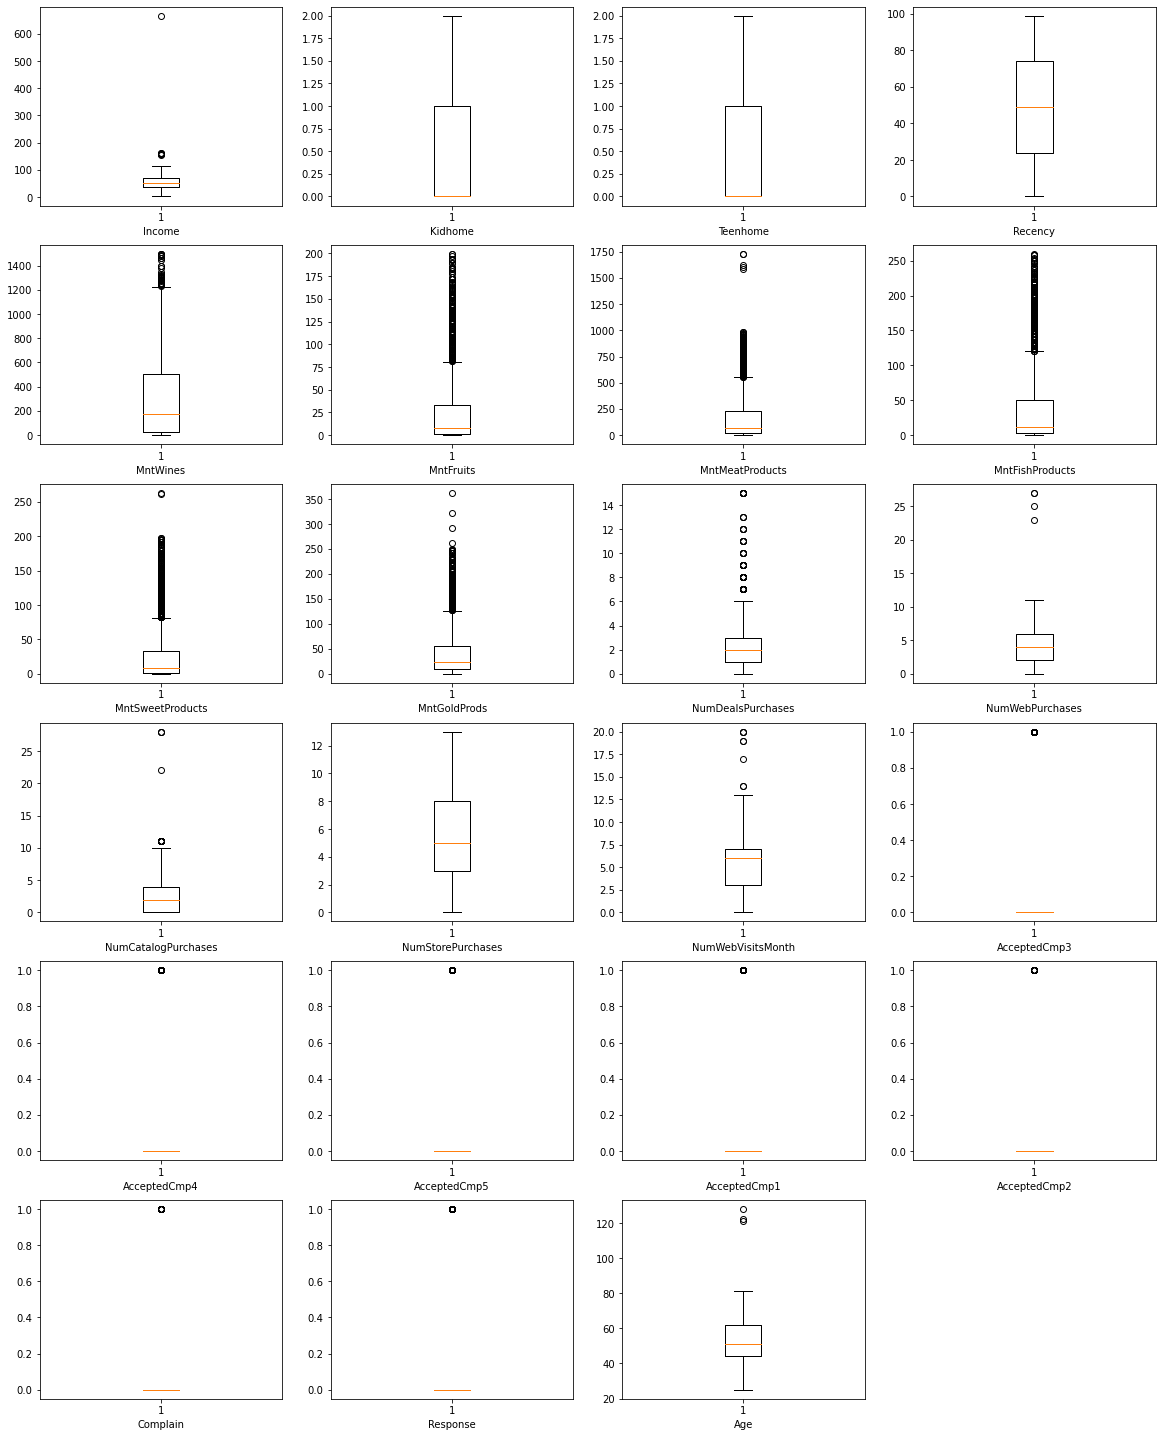

In [16]:
# using box plot to visualize outliers in numerial fields of the dataset

n = Sample.select_dtypes(include=np.number).columns.tolist()
bins=10
j=1
fig = plt.figure(figsize = (20, 30))
for i in n:
    plt.subplot(7,4,j)
    plt.boxplot(Sample[i])
    j=j+1
    plt.xlabel(i)
plt.show()

**COMMENT:** *Since we are sure about outliers in "Age" and "Income" pose unnecessary plots, therefore we can remove them. As for other fields, we are not sure, therefore we wil let them be.*

In [17]:
Sample.drop(Sample[(Sample['Income']>200)|(Sample['Age']>100)].index,inplace=True)

### Final Pre-Processsed Dataset

In [18]:
Sample.head()

Education Marital_Status  Income  Kidhome  Teenhome  Recency  MntWines  \
0  Bachelor         Single  58.138        0         0       58       635   
1  Bachelor         Single  46.344        1         1       38        11   
2  Bachelor       Together  71.613        0         0       26       426   
3  Bachelor       Together  26.646        1         0       26        11   
4       PhD        Married  58.293        1         0       94       173   

   MntFruits  MntMeatProducts  MntFishProducts  ...  NumStorePurchases  \
0         88              546              172  ...                  4   
1          1                6                2  ...                  2   
2         49              127              111  ...                 10   
3          4               20               10  ...                  4   
4         43              118               46  ...                  6   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  4             0             0             0             0   
3                  6             0             0             0             0   
4                  5             0             0             0             0   

   AcceptedCmp2  Complain  Response  Age  
0             0         0         1   64  
1             0         0         0   67  
2             0         0         0   56  
3             0         0         0   37  
4             0         0         0   40  

[5 rows x 25 columns]

----------
-----

## 2. Exploratory Data Analysis

### Univariate Analysis

We are mainly looking at each variable separately in order to derive insights from it. 

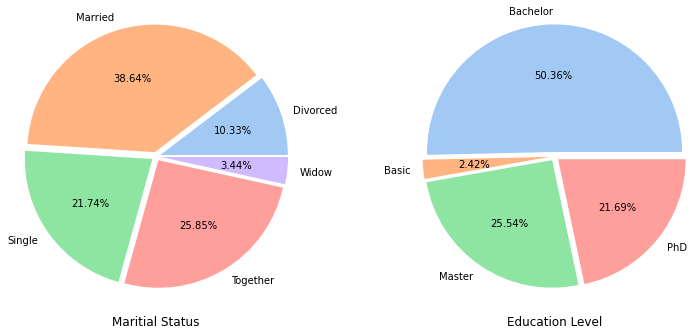

In [19]:
# Marital Status and Education Levels in a pie chart
c_count = Sample.groupby("Marital_Status").count()['Age']
label = Sample.groupby('Marital_Status').count()['Age'].index
fig, ax = plt.subplots(1, 2, figsize = (10, 12))
ax[0].pie(c_count, labels=label, colors=sns.color_palette('pastel')[0:5], autopct='%1.2f%%',radius=2,explode=[0.07,0.07,0.07,0.07,0.07])
ax[0].set_title('Maritial Status', y=-0.6)

c_count = Sample.groupby("Education").count()['Age']
label = Sample.groupby('Education').count()['Age'].index
ax[1].pie(c_count, labels=label, colors=sns.color_palette('pastel')[0:5], autopct='%1.2f%%',radius=2,explode=[0.07,0.07,0.07,0.07])
ax[1].set_title('Education Level', y=-0.6)
plt.subplots_adjust(wspace = 1.5, hspace =0)
plt.show()

**COMMENT:** *We have more Married Couples or Bachelors Degree holders as our customers. Approx. 39% and 50% respectively.*

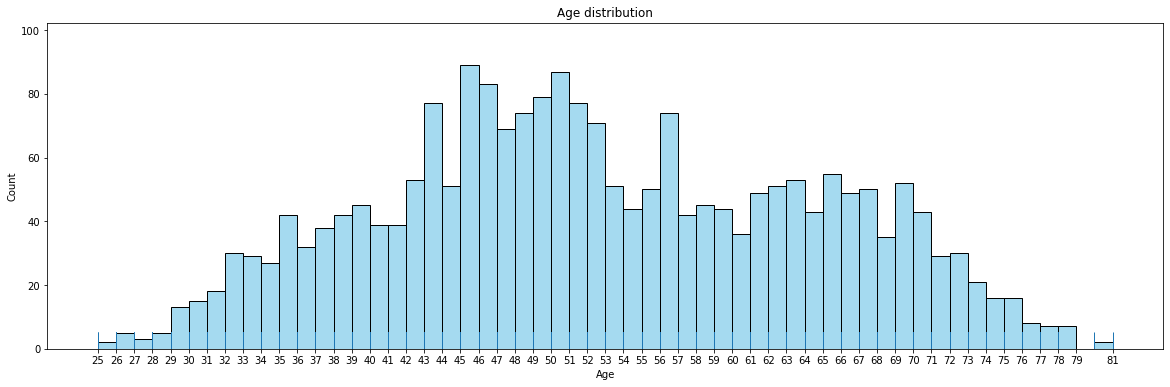

In [20]:
# Age
plt.figure(figsize=(20, 6))
plt.title('Age distribution')
ax = sns.histplot(Sample['Age'].sort_values(), bins=56, color='skyblue')
sns.rugplot(data=Sample['Age'], height=.05)
plt.xticks(np.linspace(Sample['Age'].min(), Sample['Age'].max(), 56, dtype=int, endpoint = True))
plt.show()

**COMMENT:** *Most of our customers are people among the age of 45-60 years*

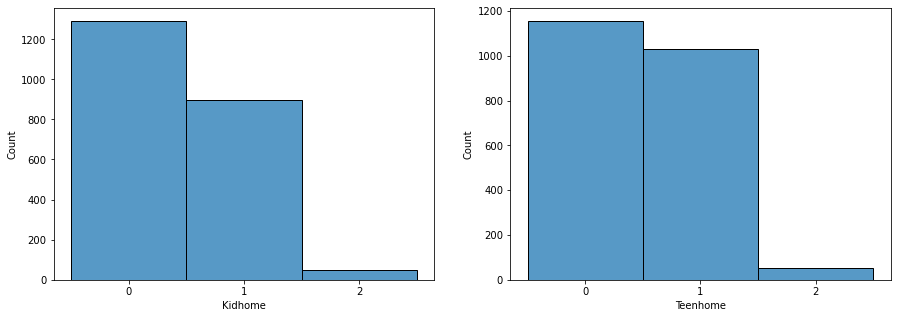

In [21]:
# Home with kids and Home with Teens
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.histplot(data=Sample, x='Kidhome', stat="count", discrete=True)
plt.xticks([0, 1, 2])

plt.subplot(122)
sns.histplot(data=Sample, x='Teenhome', stat="count",discrete=True)
plt.xticks([0, 1, 2])
plt.show()


**COMMENT:** *A very small group of people have about either 2 kids or 2 Teens in their home. Other types of customers are significantly large.*

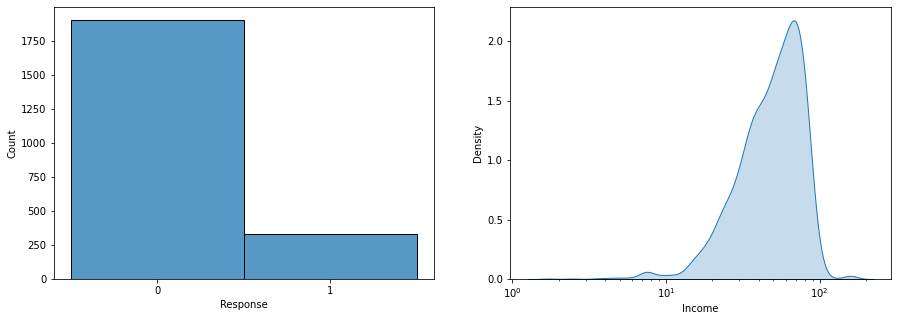

In [22]:
# Response dist. and Income Range
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.histplot(data=Sample, x='Response', stat="count", discrete=True)
plt.xticks([0, 1])

plt.subplot(122)
# Income Range
sns.kdeplot(data=Sample, x="Income", shade=True, log_scale=True)
plt.show()

**COMMENT:** 
    
   - *This shows a very bad situation. The last campaign was **mostly rejected***
    
   - *Income of most people range from 10,000 to 100,000 units*
   
-----

### Bivariate Analysis

Here we are performing a comparative analysis of how the variables relate together to each other

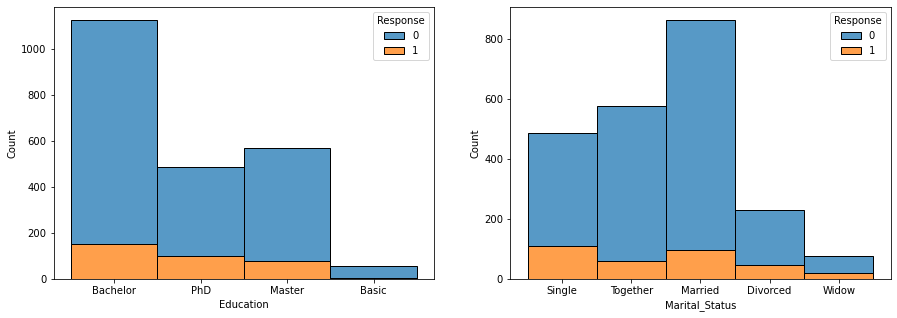

In [23]:
# Let's see if "Education" level have any impact on the "Responses" we got.
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.histplot(data=Sample, x="Education", hue="Response", multiple="stack", stat="count",color='skyblue')

# Now we will look for relations among "Marital Status" and "Responses"
plt.subplot(122)
sns.histplot(data=Sample, x="Marital_Status", hue="Response",stat="count", multiple="stack", color='skyblue')
plt.show()

**COMMENT:** 
- *Left figure; people having low education levels were not in the least interested in this campaign.*
- *Right figure; Single people were more likely to accept our offers*

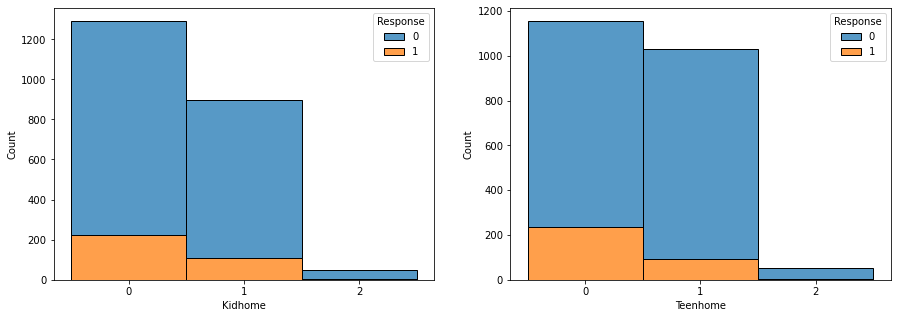

In [24]:
# Let's see if "Homw with kids" level have any impact on the "Responses" we got.
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.histplot(data=Sample, x="Kidhome", hue="Response", multiple="stack", stat="count", discrete=True)
plt.xticks([0, 1, 2])

# Now we will look for relations among "Home with teens" and "Responses"
plt.subplot(122)
sns.histplot(data=Sample, x="Teenhome", hue="Response", multiple="stack", stat="count", discrete=True)
plt.xticks([0, 1, 2])
plt.show()

**COMMENT:** *People with no kids or teens at home were more interested in our campaign*

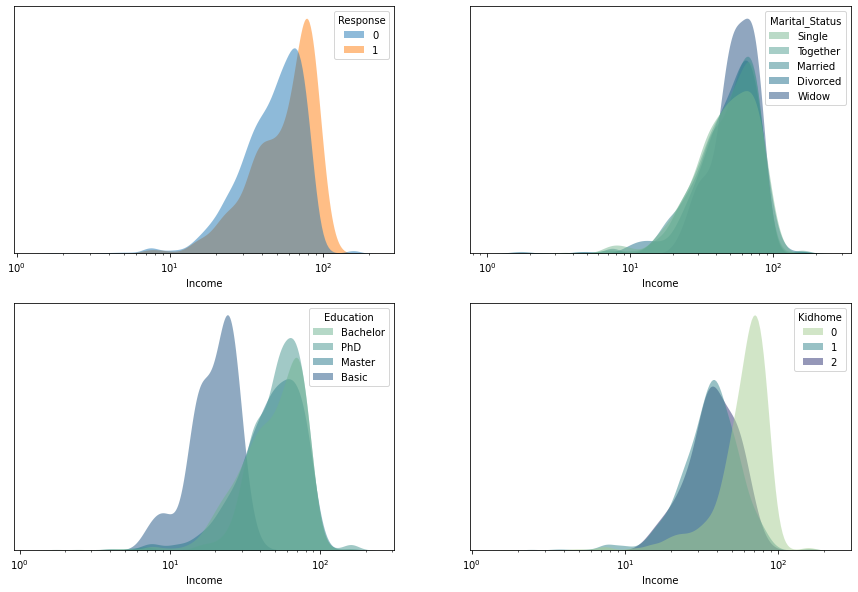

In [25]:
# Let's see if "Income" has any impact on the "Responses", "Marital Status", "Education", "Kid Home".
plt.figure(figsize=(15,10))
plt.subplot(221)
sns.kdeplot(
   data=Sample, x="Income", hue="Response", log_scale= True,
   fill=True, common_norm=False,
   alpha=.5, linewidth=0,
)
plt.gca().axes.get_yaxis().set_visible(False) # Set y invisible
plt.xlabel('Income')

# segment by Marital_Status
plt.subplot(222)
sns.kdeplot(
   data=Sample, x="Income", hue="Marital_Status", log_scale= True,
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)
plt.gca().axes.get_yaxis().set_visible(False) 

# segment by Education
plt.subplot(223)
sns.kdeplot(
   data=Sample, x="Income", hue="Education", log_scale= True,
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)
plt.gca().axes.get_yaxis().set_visible(False) 

# segment by Kidhome
plt.subplot(224)
sns.kdeplot(
   data=Sample, x="Income", hue="Kidhome", log_scale= True,
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)
plt.gca().axes.get_yaxis().set_visible(False)

**COMMENT:**
    
   - *People with more Income are more likely to accept our offers. We can say that people with income 14-15,000 or less don't seem that much interested.* 
   - *Different Marital Status does not seem to be the cause of positive or negative response to our marketing campaign.*
   - *People having lower level of education have less income. Those Bachelors, Masters or Ph.D degrees do not have clear difference between their incomes.*
   - *Those who do not have kids at home have higher income.*

----

### Multivariate Analysis

Here we are going to compare multiple variables to see if they any relations.

In [26]:
# Re-stating variable types
pd.DataFrame(Sample.nunique()).sort_values(0).rename( {0: 'Unique Values'}, axis=1)

Unique Values
Complain                         2
AcceptedCmp2                     2
AcceptedCmp1                     2
AcceptedCmp5                     2
AcceptedCmp4                     2
AcceptedCmp3                     2
Response                         2
Kidhome                          3
Teenhome                         3
Education                        4
Marital_Status                   5
NumStorePurchases               14
NumCatalogPurchases             14
NumDealsPurchases               15
NumWebPurchases                 15
NumWebVisitsMonth               16
Age                             56
Recency                        100
MntFruits                      158
MntSweetProducts               177
MntFishProducts                182
MntGoldProds                   213
MntMeatProducts                557
MntWines                       775
Income                        1971

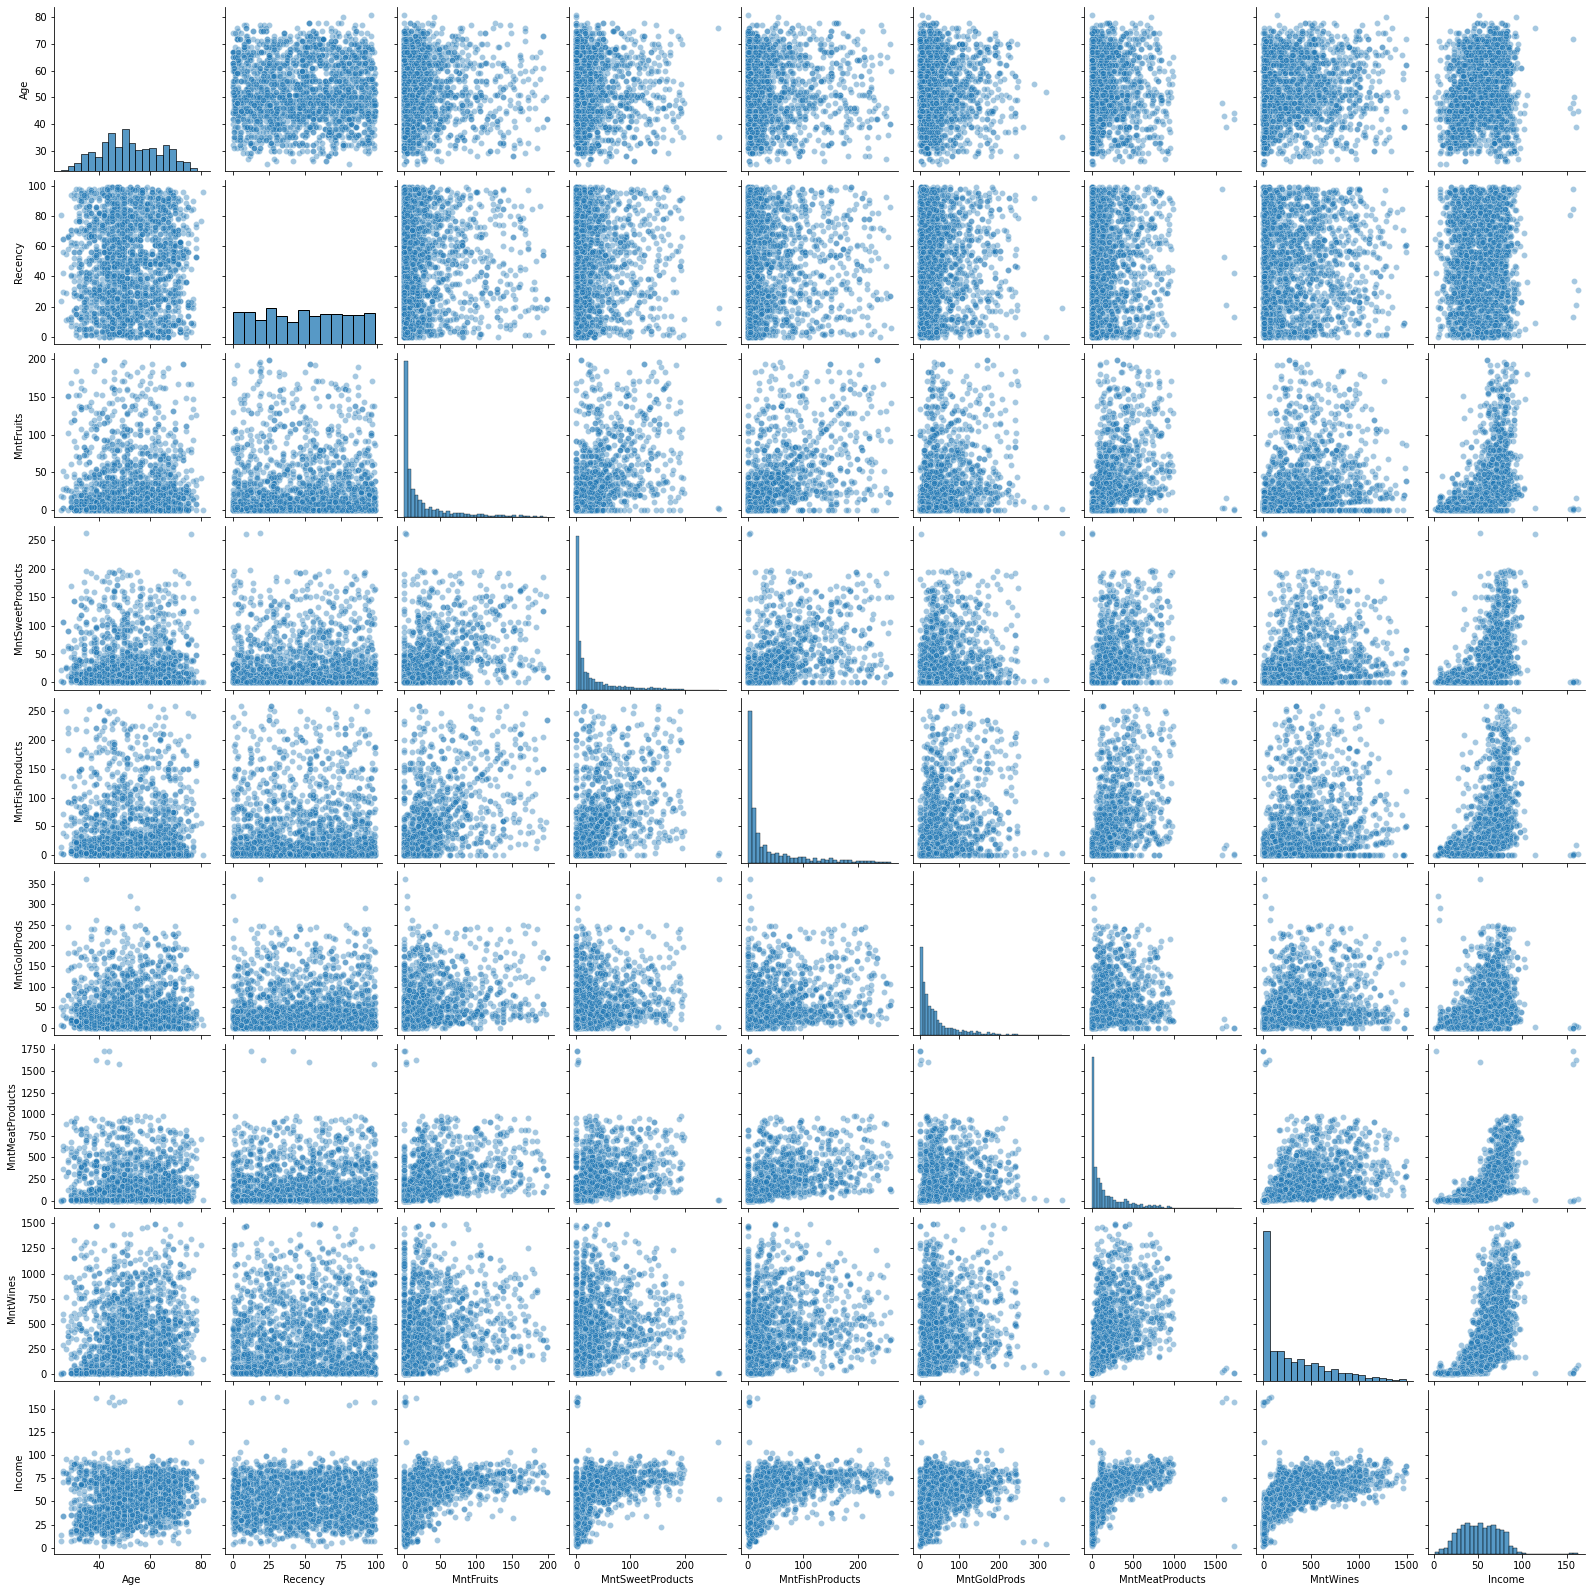

In [27]:
# looking for linear trends between numerical values
NUMERICAL_FEATURES = ['Age', 'Recency', 'MntFruits', 
                      'MntSweetProducts', 'MntFishProducts', 'MntGoldProds', 
                      'MntMeatProducts', 'MntWines', 'Income']

sns.pairplot(data=Sample[NUMERICAL_FEATURES], 
             kind='scatter', plot_kws={'alpha':0.4})
plt.show()

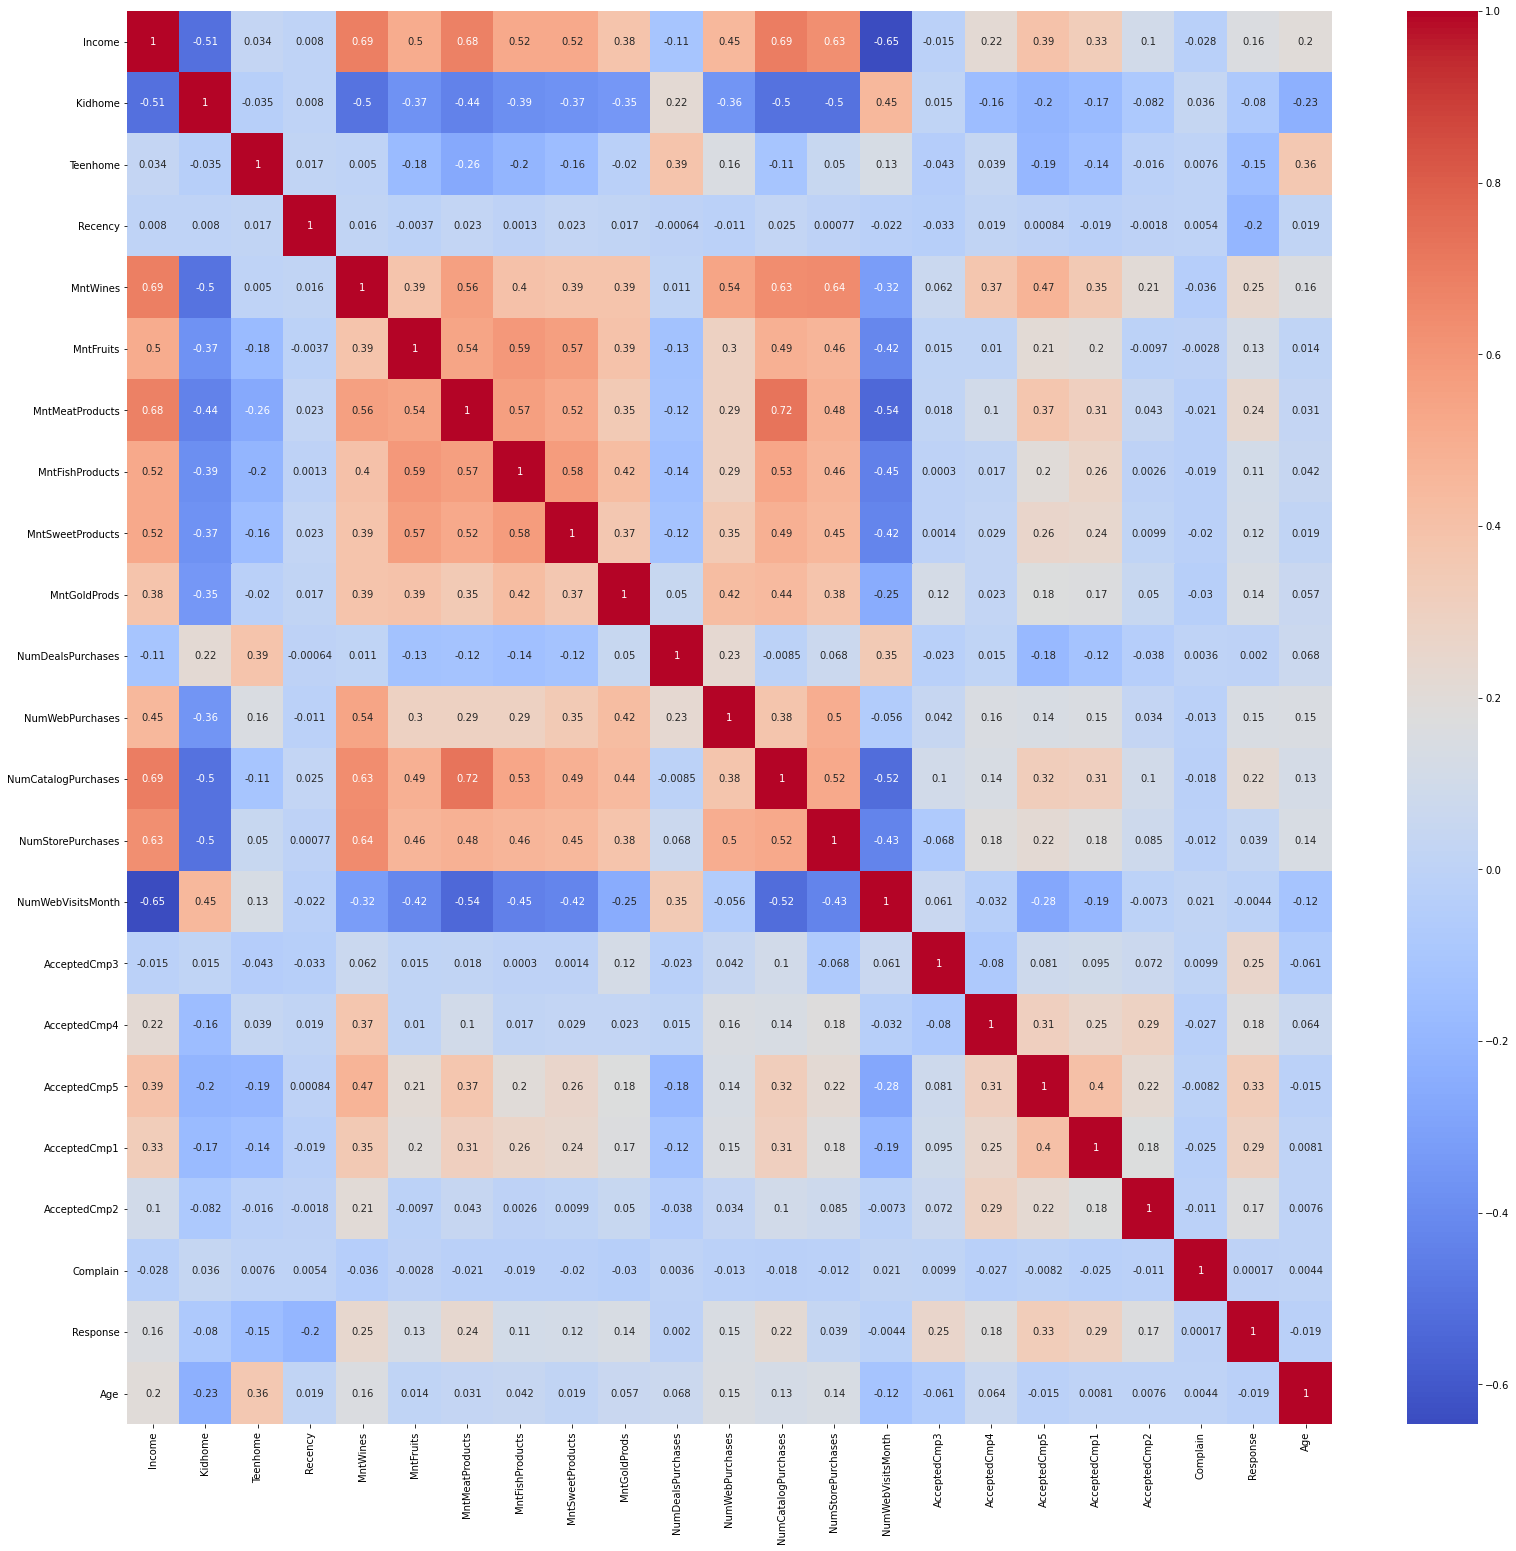

In [28]:
# Heat map among all numerical variables
cor = Sample.corr()
plt.figure(figsize = (27,26))
sns.heatmap(cor, annot = True, cmap = 'coolwarm')
plt.show()

**COMMENT:** *We found no linear relationships between the numerical variables*

----
----

## 3. Feature Selection & Dimensionality Reduction

### Preparing Sample for Prediction Models

In [29]:
# Converting Education with scale numerals
df_cluster = Sample.copy() # saving for clustering 

Sample['Education'] = Sample['Education'].replace(['Basic'], 0)
Sample['Education'] = Sample['Education'].replace(['Bachelor'], 1)
Sample['Education'] = Sample['Education'].replace(['Master'], 2)
Sample['Education'] = Sample['Education'].replace(['PhD'], 3) 

# Change Marital_Status to dummies
Sample = pd.get_dummies(Sample)
Sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Education                2236 non-null   int64  
 1   Income                   2236 non-null   float64
 2   Kidhome                  2236 non-null   int64  
 3   Teenhome                 2236 non-null   int64  
 4   Recency                  2236 non-null   int64  
 5   MntWines                 2236 non-null   int64  
 6   MntFruits                2236 non-null   int64  
 7   MntMeatProducts          2236 non-null   int64  
 8   MntFishProducts          2236 non-null   int64  
 9   MntSweetProducts         2236 non-null   int64  
 10  MntGoldProds             2236 non-null   int64  
 11  NumDealsPurchases        2236 non-null   int64  
 12  NumWebPurchases          2236 non-null   int64  
 13  NumCatalogPurchases      2236 non-null   int64  
 14  NumStorePurchases       

---

### Feature Selection by Random Forest

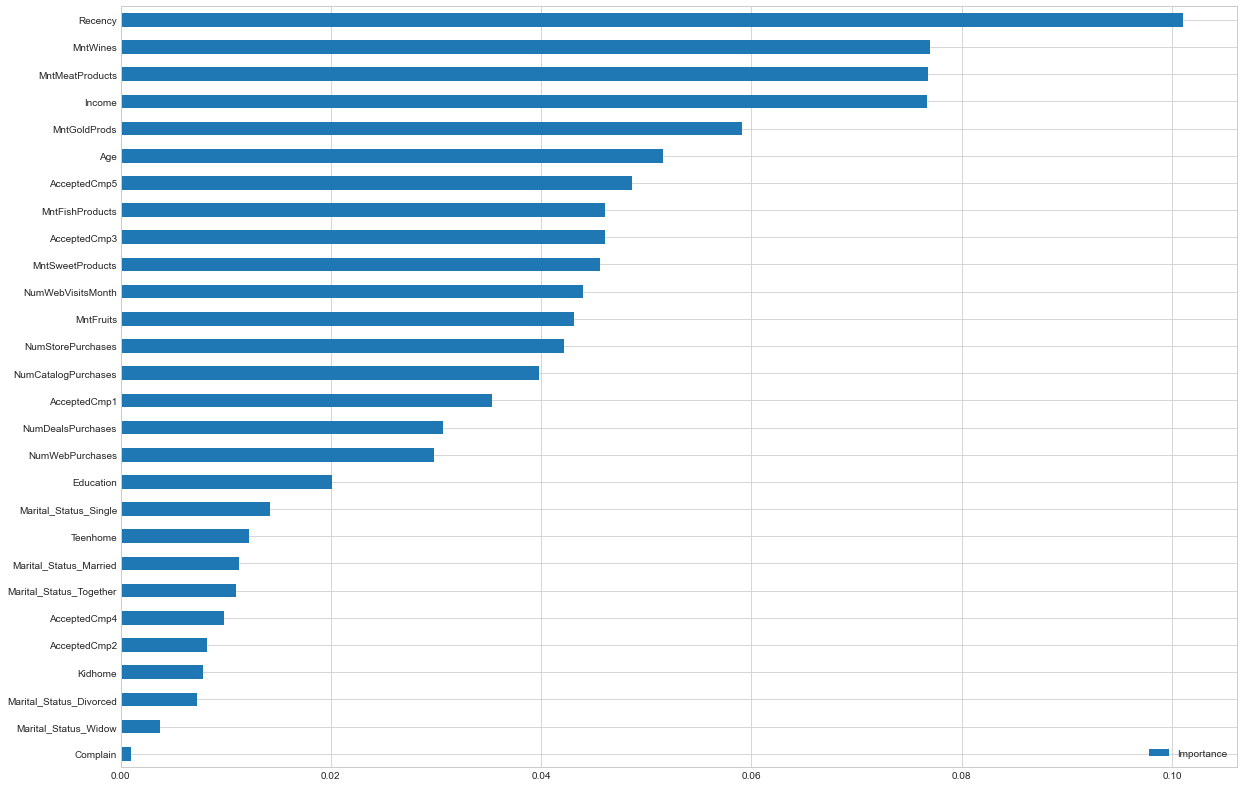

In [30]:
# Using Random Forest to gain an insight on Feature Importance
clf = RandomForestClassifier()
clf.fit(Sample.drop('Response', axis=1), Sample['Response'])

plt.style.use('seaborn-whitegrid')
importance = clf.feature_importances_
importance = pd.DataFrame(importance, index=Sample.drop('Response', axis=1).columns, columns=["Importance"])
importance.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize=(20,len(importance)/2));

In [31]:
# Choosing Features (Keep 90% Importance ratio)
feature_nums = 18
ascend_import = importance.sort_values(by='Importance', ascending=False)
all_info = ascend_import['Importance'].iloc[:feature_nums].sum()
all_choose_features = list(ascend_import.iloc[:feature_nums].index)

for i in range(len(all_choose_features)):
    if i%2==0:
        print(all_choose_features[i]+'   ;   ', end="")
    else:
        print(all_choose_features[i])

print('\n\nImportance Raio: ', all_info)

Recency   ;   MntWines
MntMeatProducts   ;   Income
MntGoldProds   ;   Age
AcceptedCmp5   ;   MntFishProducts
AcceptedCmp3   ;   MntSweetProducts
NumWebVisitsMonth   ;   MntFruits
NumStorePurchases   ;   NumCatalogPurchases
AcceptedCmp1   ;   NumDealsPurchases
NumWebPurchases   ;   Education


Importance Raio:  0.9135384404380181


---

### PCA Transformation

PCA data shape:  (2236, 19)


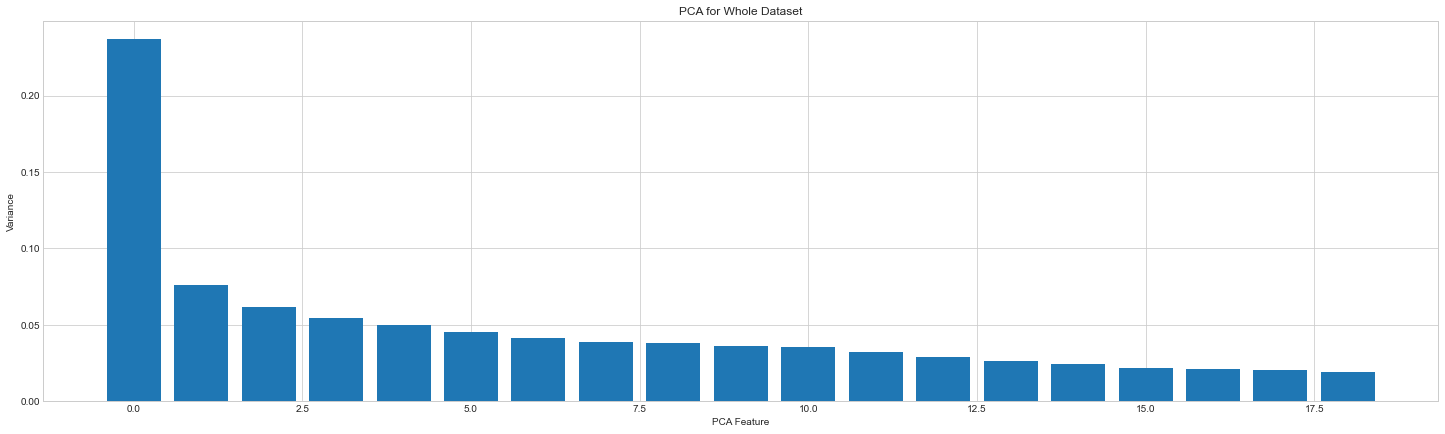

In [32]:
from sklearn.decomposition import PCA
# Calculating PCA for both datasets, and graphing the Variance for each feature, per dataset
std_scale = preprocessing.StandardScaler().fit(Sample.drop('Response', axis=1))
X = std_scale.transform(Sample.drop('Response', axis=1))

pca1 = PCA(0.90, whiten=True) # Keep 90% information
fit1 = pca1.fit(X)

# Graphing the variance per feature
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(25,7)) 
plt.xlabel('PCA Feature')
plt.ylabel('Variance')
plt.title('PCA for Whole Dataset')
plt.bar(range(0, fit1.explained_variance_ratio_.size), fit1.explained_variance_ratio_);

# Get pca transformed data
pca_data = pca1.transform(X)
pca_data = np.array(pca_data)
print('PCA data shape: ', pca_data.shape)

In [33]:
# Stores performances of models
perf_df_lst = [None, None, None] 

In [34]:
# Data sourse encoding
# 0 --> Raw Data
# 1 --> Selected Features
# 2 --> PCA

# Choose dataset
dataset_num = 1

# 0: Raw Data; 1: Feature Selection Data; 2: PCA Data
all_datasets = [Sample.drop('Response', axis=1).values, Sample[all_choose_features].values, pca_data]

# Choose data
final_data = all_datasets[dataset_num]


---
---

## 4. Supervised Predictions

### Preparing Data For Classification Models

In [35]:
# Split the dataset
from imblearn.over_sampling import SMOTE
from collections import  Counter

x_train = final_data[:2000]
y_train = Sample['Response'].values[:2000]
x_test = final_data[2000:]
y_test = Sample['Response'].values[2000:]

print('Train: ', len(x_train))
print('Test: ',  len(x_test))
print('N/P Sample: ', Counter(y_train))

# SMOTE Samples
sm = SMOTE(random_state=2)
x_train, y_train = sm.fit_resample(x_train, y_train.ravel())

print('Train: ', len(x_train))
print('Test: ',  len(x_test))
print('N/P Sample: ', Counter(y_train))

# MCC scorer function
mcc_scorer = make_scorer(matthews_corrcoef)

Train:  2000
Test:  236
N/P Sample:  Counter({0: 1698, 1: 302})
Train:  3396
Test:  236
N/P Sample:  Counter({1: 1698, 0: 1698})


#### Why SMOTE (Dataset Extended Trick) & MCC Scorer (Matthews correlation coefficient) ?

> As we find in the data exploration phase, this is an unbalanced dataset(over 80% say no to the compaign). So the models are easy to learn some traits about negative samples, but it might be hard to get from positive samples.

> While SMOTE alleviate the problem by offering us more positive training samples.

> At the same time, MCC scorer takes into account true and false positives and negatives and is generally regarded as a balanced measure which can be used even if the classes are of very different sizes. In this learning task, MCC is a more efficient measure than accuracy in test period, because there are only a few positive samples in the test set.

---

### Logistic Regression

In [36]:
LR = LogisticRegression()

# K-Fold Validation
kfold = 8

# ACC Score
LR_cv_results_acc = cross_val_score(LR, x_train, y_train, cv=kfold, scoring='accuracy')   
msg = "%s k-fold ACC: %f (%f)" % ('LR', LR_cv_results_acc.mean(), LR_cv_results_acc.std())
print(msg)

# MCC Score
LR_cv_results_mcc = cross_val_score(LR, x_train, y_train, cv=kfold, scoring=mcc_scorer)   
msg = "%s k-fold MCC: %f (%f)" % ('LR', LR_cv_results_mcc.mean(), LR_cv_results_mcc.std())
print(msg)

C:\Users\D4Rk_C4K3\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\D4Rk_C4K3\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

LR k-fold ACC: 0.749420 (0.015291)


C:\Users\D4Rk_C4K3\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\D4Rk_C4K3\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

LR k-fold MCC: 0.499386 (0.030593)


C:\Users\D4Rk_C4K3\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<p><b>OUTPUT>></b>LR k-fold ACC: 0.749420 (0.015291)</p>
<p><b>OUTPUT>></b>LR k-fold MCC: 0.499386 (0.030593)</p>

---

### Boosting Tree

In [37]:
# Validation for Boosting Tree
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=160, random_state=1)  
# ACC Score
BT_cv_results_acc = cross_val_score(clf, x_train, y_train, cv=kfold, scoring='accuracy')   
msg = "k-fold ACC: %f (%f)" % (BT_cv_results_acc.mean(), BT_cv_results_acc.std())
print(msg)

# MCC Score
BT_cv_results_mcc = cross_val_score(clf, x_train, y_train, cv=kfold, scoring=mcc_scorer)   
msg = "k-fold MCC: %f (%f)" % (BT_cv_results_mcc.mean(), BT_cv_results_mcc.std())
print(msg)

k-fold ACC: 0.903770 (0.098183)
k-fold MCC: 0.820331 (0.172560)


---

### SVM

In [38]:
SVM=svm.SVC(kernel = 'rbf', C = 10, gamma = 0.01)

# ACC Score
svm_cv_results_acc = cross_val_score(SVM, x_train, y_train, cv=kfold, scoring='accuracy')   
msg = "k-fold ACC: %f (%f)" % (svm_cv_results_acc.mean(), svm_cv_results_acc.std())
print(msg)

# MCC Score
svm_cv_results_mcc = cross_val_score(SVM, x_train, y_train, cv=kfold, scoring=mcc_scorer)   
msg = "k-fold MCC: %f (%f)" % (svm_cv_results_mcc.mean(), svm_cv_results_mcc.std())
print(msg)

k-fold ACC: 0.802105 (0.023620)
k-fold MCC: 0.644576 (0.039894)


---

### Neural Networks

In [39]:
# import modules
from keras import models
from keras import layers

x_nn = x_train
y_nn = y_train

In [40]:
# Define the K-fold Cross Validator
kfold_obj = KFold(n_splits=kfold, shuffle=True)
epochs = 150
batch_size = 64
acc_per_fold = []
mcc_per_fold = []

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold_obj.split(x_nn, y_nn):
    
    model = models.Sequential()
    # Only use shallow Neural Network
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
    
    # Fit data to model
    history = model.fit(x_nn[train], y_nn[train].reshape(-1, 1),
              batch_size=64,
              epochs=100)

    # Generate generalization metrics
    predictions = model.predict(x_nn[test])
    
    for i in range(len(predictions)):
        if predictions[i] >=0.5:
            predictions[i] = 1
        else:
            predictions[i] = 0
            
    acc_per_fold.append(accuracy_score(predictions, y_nn[test]))
    mcc_per_fold.append(matthews_corrcoef(predictions, y_nn[test]))

    # Increase fold number
    fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/100
47/47 [==============================] - 4s 7ms/step - loss: 58.2627 - accuracy: 0.4325
Epoch 2/100
47/47 [==============================] - 0s 1ms/step - loss: 10.0234 - accuracy: 0.5133
Epoch 3/100
47/47 [==============================] - 0s 1ms/step - loss: 3.9056 - accuracy: 0.5894
Epoch 4/100
47/47 [==============================] - 0s 2ms/step - loss: 2.0667 - accuracy: 0.6186
Epoch 5/100
47/47 [==============================] - 0s 1ms/step - loss: 1.4780 - accuracy: 0.6560
Epoch 6/100
47/47 [==============================] - 0s 1ms/step - loss: 1.2283 - accuracy: 0.6651
Epoch 7/100
47/47 [==============================] - 0s 978us/step - loss: 1.1039 - accuracy: 0.6782
Epoch 8/100
47/47 [==============================] - 0s 1ms/step - loss: 1.0582 - accuracy: 0.6870
Epoch 9/100
47/47 [==============================] - 0s 1ms/step - loss: 0.9297 - accuracy: 0.7072
Epoch 10

In [41]:
# NN Performance  
acc_per_fold, mcc_per_fold = np.array(acc_per_fold), np.array(mcc_per_fold)
msg = "k-fold ACC: %f (%f)" % (acc_per_fold.mean(), acc_per_fold.std())
print(msg)
msg = "k-fold MCC: %f (%f)" % (mcc_per_fold.mean(), mcc_per_fold.std())
print(msg)

k-fold ACC: 0.821561 (0.036493)
k-fold MCC: 0.660681 (0.059106)


---

### Performance Comparison Among All 4 Models

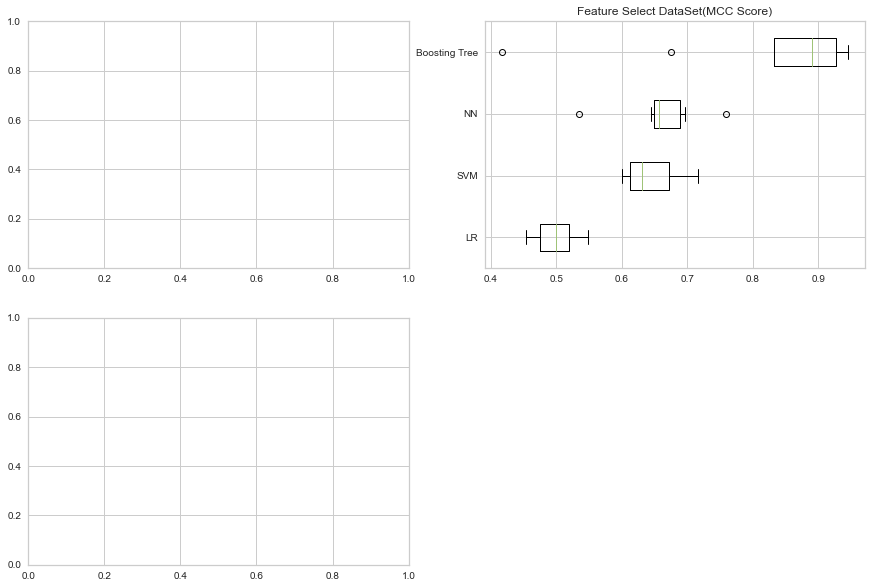

In [66]:
perf_df_lst[dataset_num] = pd.DataFrame({
    'LR': LR_cv_results_mcc,
    'SVM': svm_cv_results_mcc,
    'NN': mcc_per_fold,
    'BT': BT_cv_results_mcc
})

plt.figure(figsize=(15,10))
name_lst = ['LR', 'SVM', 'NN', 'Boosting Tree']

try:
    ax = plt.subplot(2, 2, 1)
    ax.boxplot(perf_df_lst[0].values, vert = 0)
    ax.set_yticklabels(name_lst)
    ax.set_title('Raw DataSet(MCC Score)')
except:
    pass
    
try:
    ax2 = plt.subplot(2, 2, 2)
    ax2.boxplot(perf_df_lst[1].values, vert = 0)
    ax2.set_yticklabels(name_lst)
    ax2.set_title('Feature Select DataSet(MCC Score)')
except:
    pass

try:
    ax2 = plt.subplot(2, 2, 3)
    ax2.boxplot(perf_df_lst[2].values, vert = 0)
    ax2.set_yticklabels(name_lst)
    ax2.set_title('PCA DataSet(MCC Score)')
except:
    pass

plt.show()

**COMMENT:** 
- *Boosting Tree works really well among all the tested models(in all three datasets).*
- *Boosting Tree has some outliers in "Feature-Selected Dataset" and "Raw Dataset". This shows that this model might not work well in these datasets.*
- *In conclusion we are using Boosting **Tree dataset + Feature-Selected dataset** to achieve the best MCC score.*
    
> **NOTE:** Boosting tree may have outliers but that is comparable with other models' performances

---

### Final Model Performance

[[190  14]
 [ 15  17]]


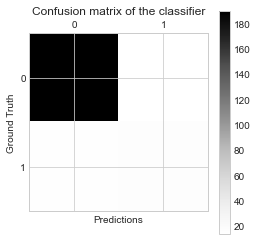

Train MCC: 0.9894020385748943
Test MCC:  0.46887717596730055
Test ACC:  0.8771186440677966
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       204
           1       0.55      0.53      0.54        32

    accuracy                           0.88       236
   macro avg       0.74      0.73      0.73       236
weighted avg       0.88      0.88      0.88       236



In [43]:
# Raw dataset + Boosting Tree
dataset_num = 1 # feature selection
dataset = all_datasets[dataset_num]

# Split train & test
x_train = dataset[:2000]
y_train = Sample['Response'].values[:2000]
x_test = dataset[2000:]
y_test = Sample['Response'].values[2000:]

# SMOTE Samples
sm = SMOTE(random_state=2)
x_train, y_train = sm.fit_resample(x_train, y_train.ravel())

'''
Train & Test Model
'''
BT = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=200)  
BT.fit(x_train, y_train)
predictions = BT.predict(x_test)

# Confusion Matrix
cm = confusion_matrix(y_test, predictions)
print(cm)
plt.matshow(cm)
plt.title('Confusion matrix of the classifier')
plt.xlabel("Predictions")
plt.ylabel("Ground Truth")
plt.colorbar()
plt.show()

# Classification Report
BT_MCC = matthews_corrcoef(y_test, predictions)

print('Train MCC: '+ str(matthews_corrcoef(BT.predict(x_train), y_train)))
print('Test MCC: ', str(BT_MCC))
print('Test ACC: ', accuracy_score(predictions, y_test))
print(classification_report(y_test, predictions))

**COMMENT:** 
- *The overall test accuracy of the model is 0.88. But dive deep into the score report, the model performs quite good in recognizing negative samples(0), but not good in positive samples (precision: 0.55, recall: 0.55).*
- *The test MCC is 0.469, which indicates that the model may not good at finding positive samples in test set. While we find the Train MCC is 0.98, this result shows there might exist overfitting problem in the model. But the fact is even I tried a lot to simplify the model and the train MCC decreases a lot, the test mcc still can not show much improvements. This result might indicate the predictors we use in this dataset might not predict 'Response' very well.*

---
---

## Un-Supervised Learning

### Feature Engineering and Clustering

In [44]:
# Inspecting dataframe cluster
pd.DataFrame(df_cluster.nunique()).sort_values(0).rename( {0: 'Unique Values'}, axis=1)

Unique Values
Complain                         2
AcceptedCmp2                     2
AcceptedCmp1                     2
AcceptedCmp5                     2
AcceptedCmp4                     2
AcceptedCmp3                     2
Response                         2
Kidhome                          3
Teenhome                         3
Education                        4
Marital_Status                   5
NumStorePurchases               14
NumCatalogPurchases             14
NumDealsPurchases               15
NumWebPurchases                 15
NumWebVisitsMonth               16
Age                             56
Recency                        100
MntFruits                      158
MntSweetProducts               177
MntFishProducts                182
MntGoldProds                   213
MntMeatProducts                557
MntWines                       775
Income                        1971

In [45]:
# binary visualization of Marital Status. Since our interest is that either a person is in relationship or they are single.

df_cluster['Marital_Status'] = df_cluster['Marital_Status'].replace(['Widow','Divorced'],'Single')
df_cluster['Marital_Status'] = df_cluster['Marital_Status'].replace(['Married','Together'],'Relationship')
df_cluster.Marital_Status.value_counts()

Relationship    1442
Single           794
Name: Marital_Status, dtype: int64

In [46]:
# Combine 'Kidhome' and 'Teenhome' to 'Children', indicating the total num of children in home.
df_cluster['Children'] = df_cluster['Kidhome'] + df_cluster['Teenhome']

In [47]:
# Add 'MntTotal' - the total purchasing amount of all products
df_cluster['MntTotal'] = np.sum(df_cluster.filter(regex='Mnt'), axis=1)

In [48]:
# Add 'NumTotal' - the total purchasing number of different purchasing types
df_cluster['NumTotal'] = np.sum(df_cluster.filter(regex='Purchases'), axis=1)

In [49]:
# We don't care the which compaign the customer participate in; Instead, we care about the total participation times
df_cluster['TotalAccepted'] = np.sum(df_cluster.filter(regex='Accepted'),axis=1)
df_cluster.drop(columns=['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2'],inplace=True)

In [50]:
# Cacluate Average of purchases per visit to the website, which can reflect the personality of the customer.
df_cluster['AvgWeb'] = round(df_cluster['NumWebPurchases'] / df_cluster['NumWebVisitsMonth'], 2)
df_cluster.fillna({'AvgWeb' : 0},inplace=True) # Handling for cases where division by 0
df_cluster.replace(np.inf, 0, inplace=True)

In [51]:
# Encoding non-numerical columns: 'Education' & 'Marital_Status'
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()
for i in ['Education', 'Marital_Status']:
    df_cluster[i]=df_cluster[[i]].apply(encode.fit_transform)

In [52]:
df_cluster

Education  Marital_Status  Income  Kidhome  Teenhome  Recency  MntWines  \
0             0               1  58.138        0         0       58       635   
1             0               1  46.344        1         1       38        11   
2             0               0  71.613        0         0       26       426   
3             0               0  26.646        1         0       26        11   
4             3               0  58.293        1         0       94       173   
...         ...             ...     ...      ...       ...      ...       ...   
2235          0               0  61.223        0         1       46       709   
2236          3               0  64.014        2         1       56       406   
2237          0               1  56.981        0         0       91       908   
2238          2               0  69.245        0         1        8       428   
2239          3               0  52.869        1         1       40        84   

      MntFruits  MntMeatProducts  MntFishProducts  ...  NumStorePurchases  \
0            88              546              172  ...                  4   
1             1                6                2  ...                  2   
2            49              127              111  ...                 10   
3             4               20               10  ...                  4   
4            43              118               46  ...                  6   
...         ...              ...              ...  ...                ...   
2235         43              182               42  ...                  4   
2236          0               30                0  ...                  5   
2237         48              217               32  ...                 13   
2238         30              214               80  ...                 10   
2239          3               61                2  ...                  4   

      NumWebVisitsMonth  Complain  Response  Age  Children  MntTotal  \
0                     7         0         1   64         0      1617   
1                     5         0         0   67         2        27   
2                     4         0         0   56         0       776   
3                     6         0         0   37         1        53   
4                     5         0         0   40         1       422   
...                 ...       ...       ...  ...       ...       ...   
2235                  5         0         0   54         1      1341   
2236                  7         0         0   75         3       444   
2237                  6         0         0   40         0      1241   
2238                  3         0         0   65         1       843   
2239                  7         0         1   67         2       172   

      NumTotal  TotalAccepted  AvgWeb  
0           25              0    1.14  
1            6              0    0.20  
2           21              0    2.00  
3            8              0    0.33  
4           19              0    1.00  
...        ...            ...     ...  
2235        18              0    1.80  
2236        22              1    1.14  
2237        19              1    0.33  
2238        23              0    2.00  
2239        11              0    0.43  

[2236 rows x 25 columns]

#### Why we need feature engineering for clustering ?
> For customer segmentation, it is better to have a more generalistic approach than diving into the finer details, because we want the number of clusters to be relatively less, and the algorithm will automatically group based on what the data is feeded.

> The clustering algorithm won't be able to distinguish or categorize related records into groups, like we have done - segment people into Single or in a Relationship, or sum up all the amount of purchasing goods.

> Some interesting ratios, like 'AvgWeb', is not easy to extract for algorithms. So it is better to predefine some ratios that might reflect the personalities of customers.

---
### K-Means

In [53]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# Get cluster data
cluster_data = df_cluster.values

# Standardize data
std_scale = preprocessing.StandardScaler().fit(cluster_data)
cluster_data = std_scale.transform(cluster_data)

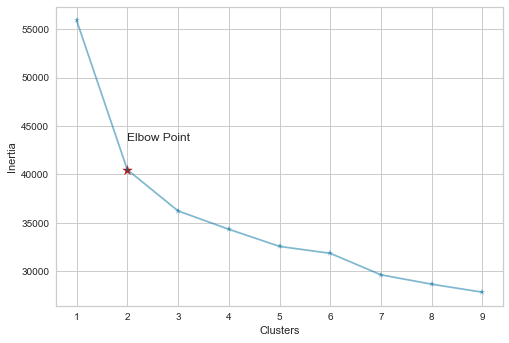

In [54]:
# Determine K using Inertia_
inertia = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 10)
    kmeans.fit(cluster_data)
    inertia.append(kmeans.inertia_)
    
elbow = 2
plt.plot(range(1, 10), inertia, marker = '*', alpha=0.5)
plt.scatter(elbow, inertia[elbow-1], s=100, c='r', marker='*')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.annotate('Elbow Point' ,(elbow, inertia[elbow-1]), xytext=(elbow,inertia[elbow-1] + 3000))
plt.show()

Mean K:  7.25


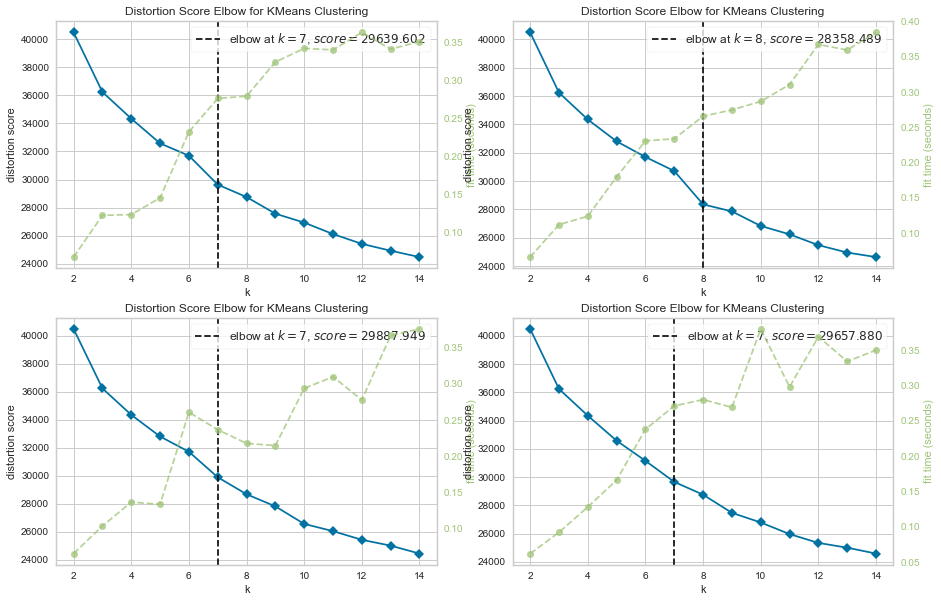

In [55]:
# Instantiate the clustering model and visualizer
model = KMeans(init = 'k-means++')
k_lst = []

# perform K-means 4 times(different intial clusters)
plt.figure(figsize=(15,10))
plt.subplot(221)
visualizer = KElbowVisualizer(model, k=(2,15), metric='distortion')
visualizer.fit(cluster_data)        # Fit the data to the visualizer
visualizer.finalize()
k_lst.append(visualizer.elbow_value_)

plt.subplot(222)
visualizer = KElbowVisualizer(model, k=(2,15), metric='distortion')
visualizer.fit(cluster_data)        # Fit the data to the visualizer
visualizer.finalize()
k_lst.append(visualizer.elbow_value_)

plt.subplot(223)
visualizer = KElbowVisualizer(model, k=(2,15), metric='distortion')
visualizer.fit(cluster_data)        # Fit the data to the visualizer
visualizer.finalize()
k_lst.append(visualizer.elbow_value_)

plt.subplot(224)
visualizer = KElbowVisualizer(model, k=(2,15), metric='distortion')
visualizer.fit(cluster_data)        # Fit the data to the visualizer
visualizer.finalize()
k_lst.append(visualizer.elbow_value_)

print('Mean K: ', np.mean(k_lst))

#### Different Scoring Metrics for K-means
>The above scoring parameter metric is set to distortion, which computes the sum of squared distances from each point to its assigned center.

>The silhouette score calculates the mean Silhouette Coefficient of all samples, while the calinski_harabasz score computes the ratio of dispersion between and within clusters. I also use these 2 metrics to get clusters.

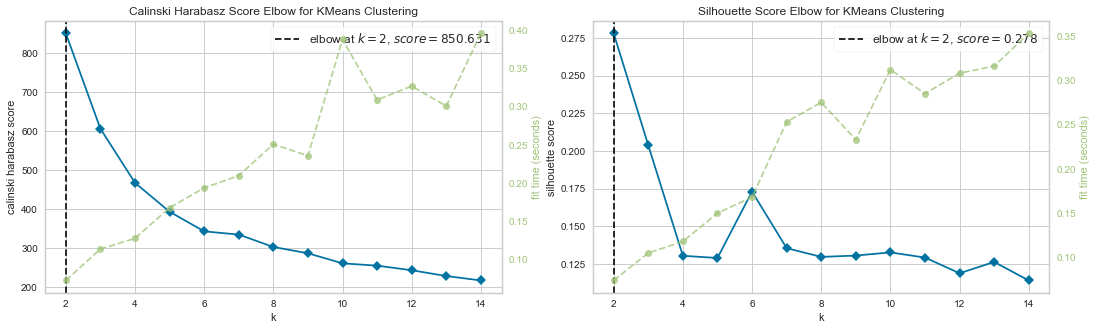

In [56]:
# Calinski_harabasz Scoring Matrix
plt.figure(figsize=(18,5))

plt.subplot(121)
visualizer = KElbowVisualizer(model, k=(2,15), metric='calinski_harabasz')
visualizer.fit(cluster_data)        # Fit the data to the visualizer
visualizer.finalize()

# Silhouette Scoring Matrix
plt.subplot(122)
visualizer = KElbowVisualizer(model, k=(2,15), metric='silhouette')
visualizer.fit(cluster_data)        # Fit the data to the visualizer
visualizer.finalize()
plt.show()

#### Choosing K value
> When we use inertia, Calinski_harabasz scorer and Silhouette scorer, we all get elbow point at K=2;

> While Distortion scorer says that K=7, we could see distortion scores come at eblow point at about 3.

> Considering all the clutering results, I finally choose K=2 to cluster the customers.

In [57]:
# Building & Fitting K-Means Models
kmeans = KMeans(n_clusters=2, init = 'k-means++').fit(cluster_data)
pred = kmeans.predict(cluster_data)
df_cluster['Cluster'] = pred + 1

In [58]:
# Inspect the cluter nums
df_cluster["Cluster"].value_counts()

1    1306
2     930
Name: Cluster, dtype: int64

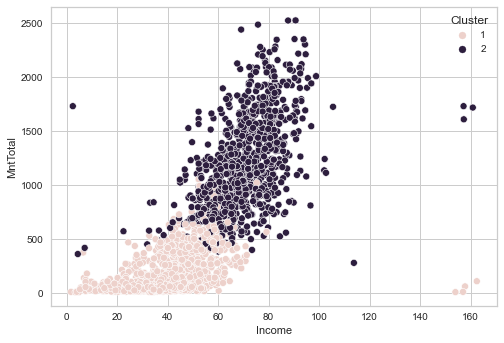

In [59]:
# We could see the the clear difference between the 2 cluster (A.T Income and MntTotal)
sns.scatterplot(x='Income',y='MntTotal',hue='Cluster',data=df_cluster)
plt.show()

C:\Users\D4Rk_C4K3\anaconda3\lib\site-packages\seaborn\axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


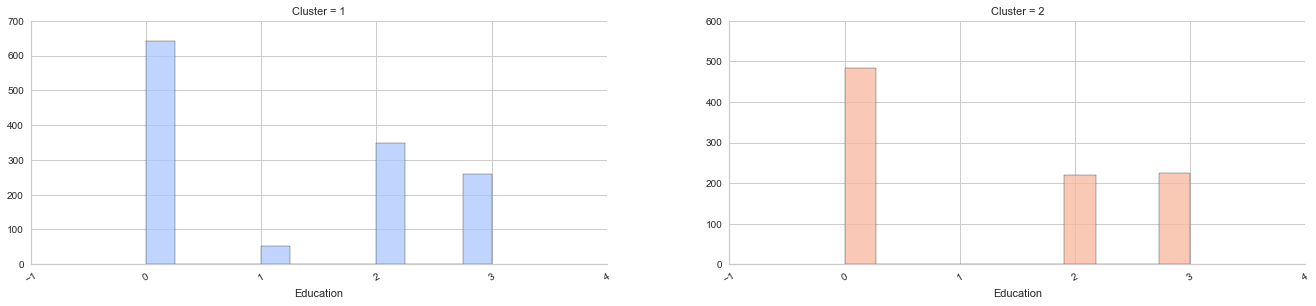

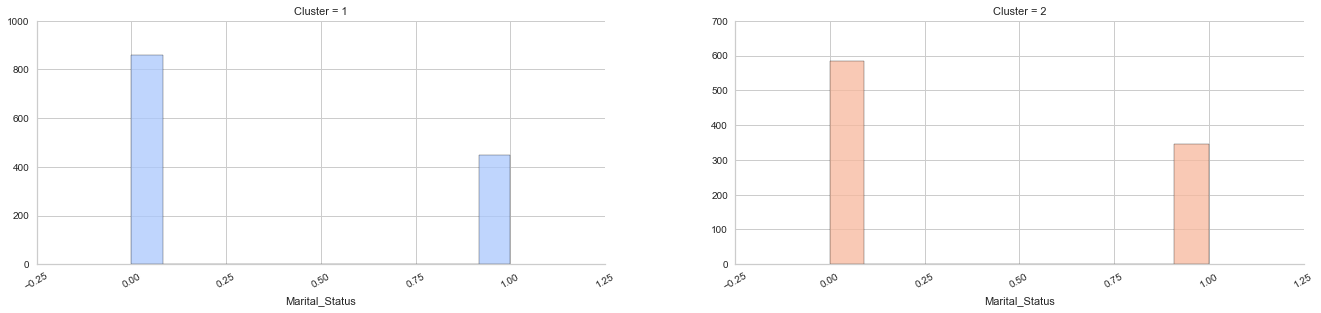

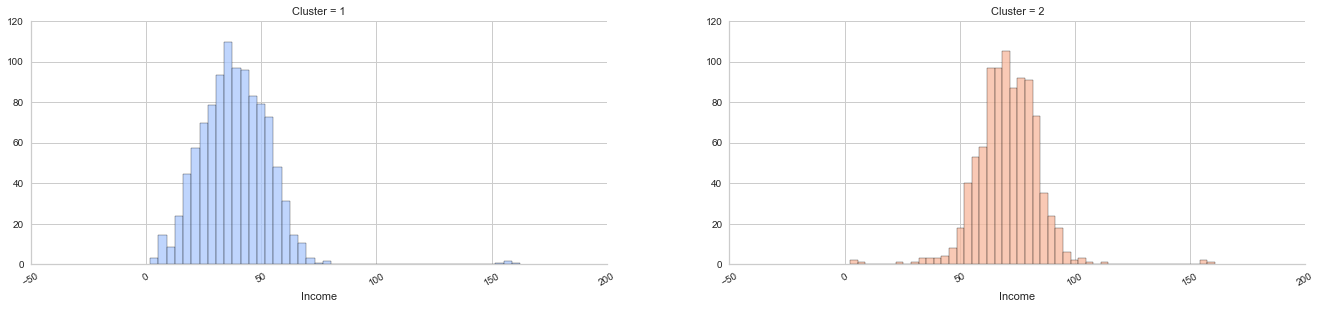

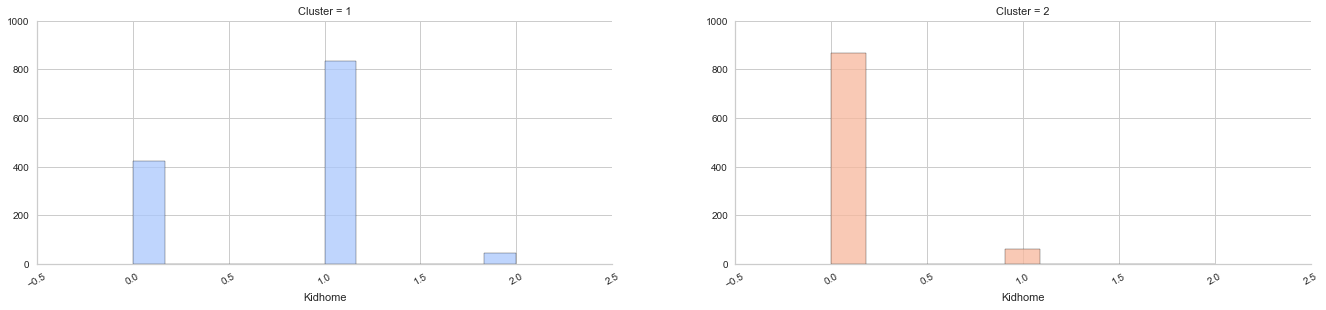

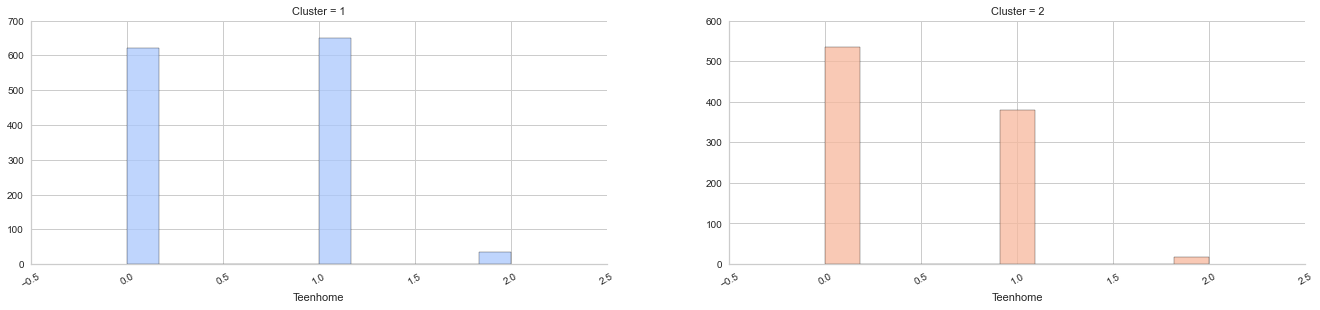

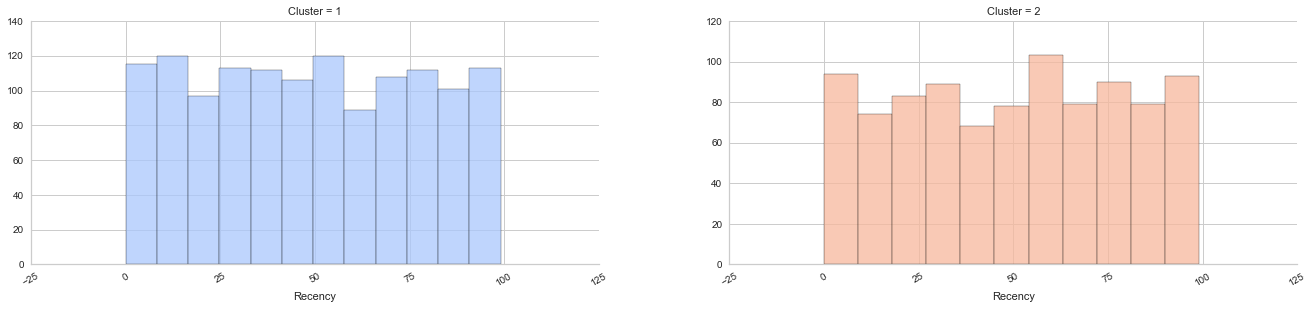

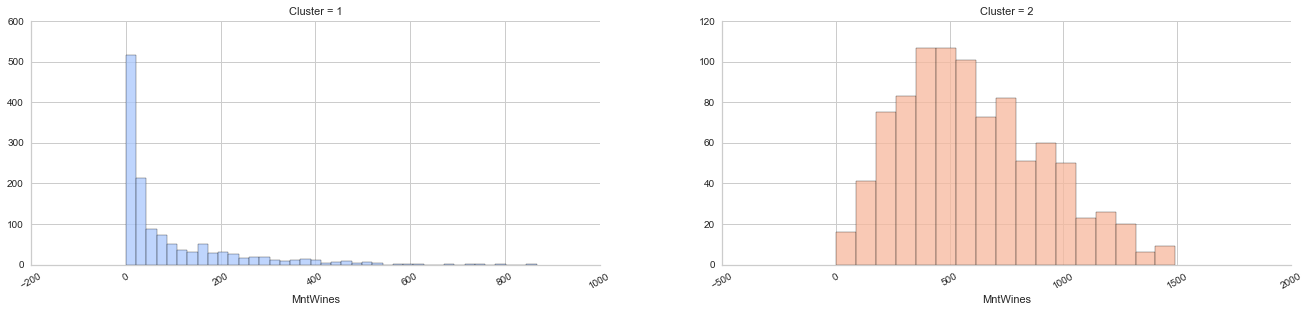

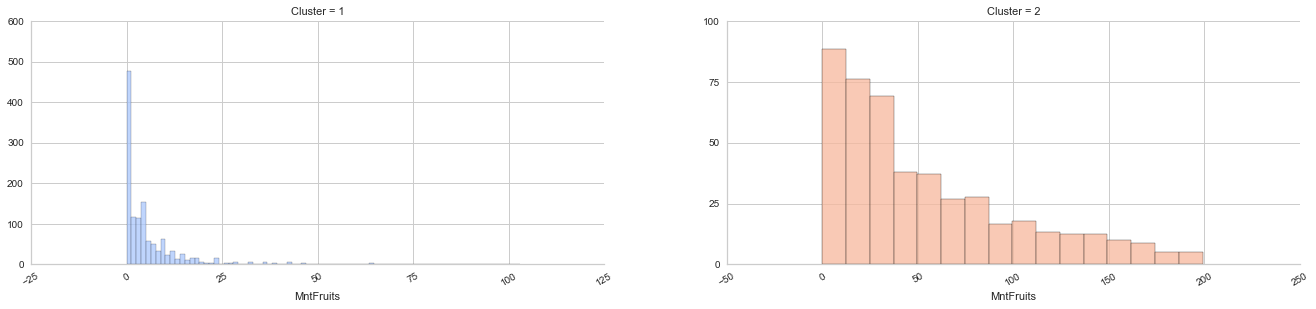

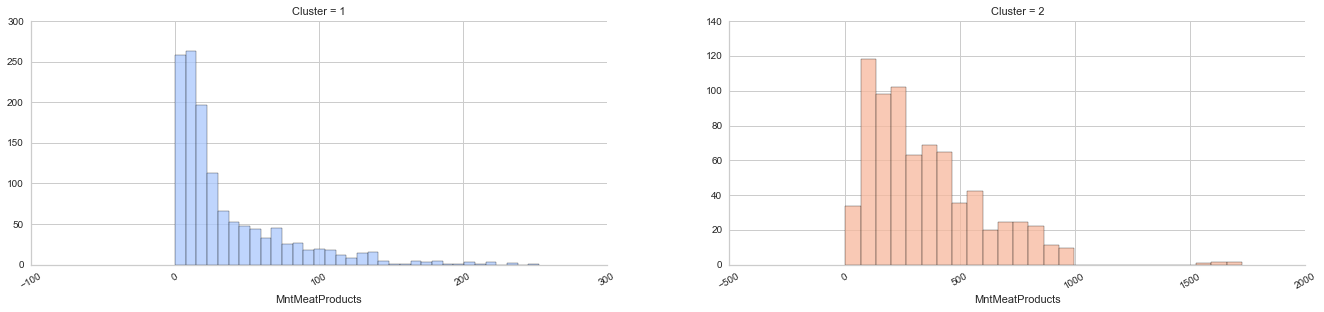

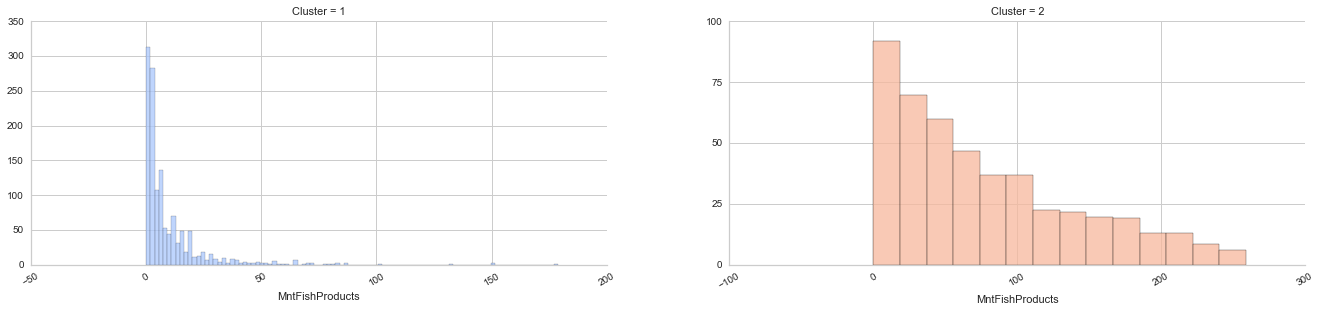

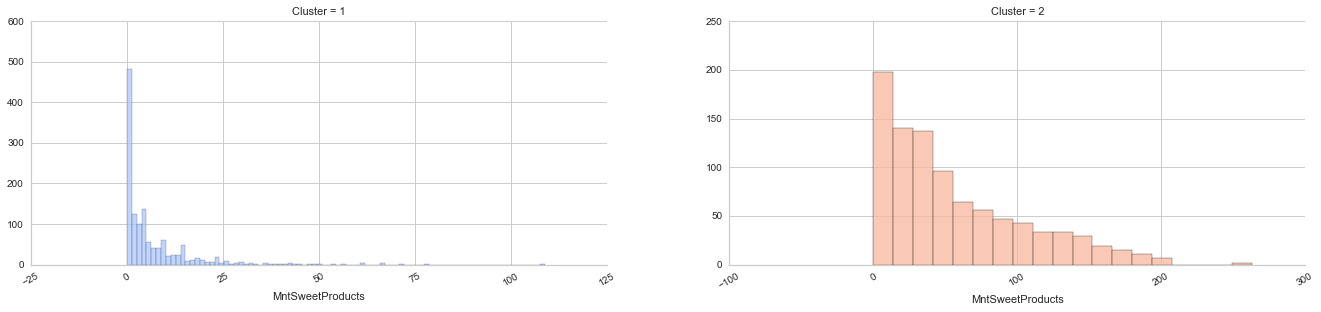

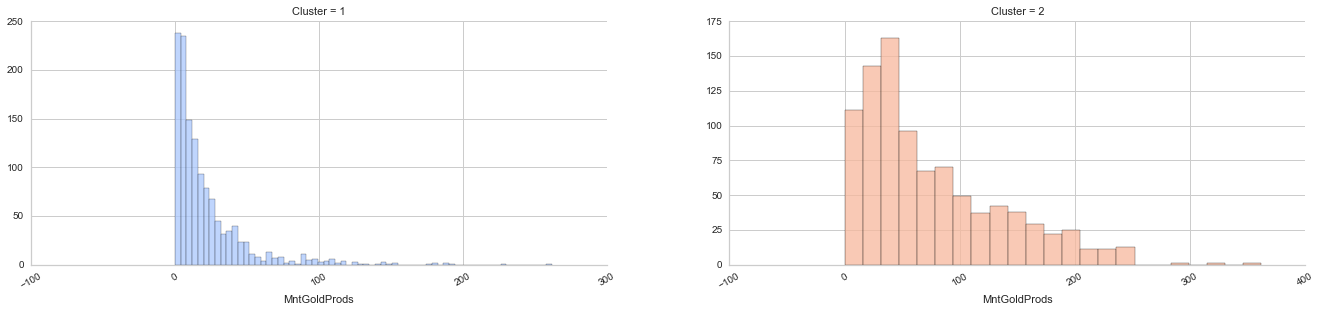

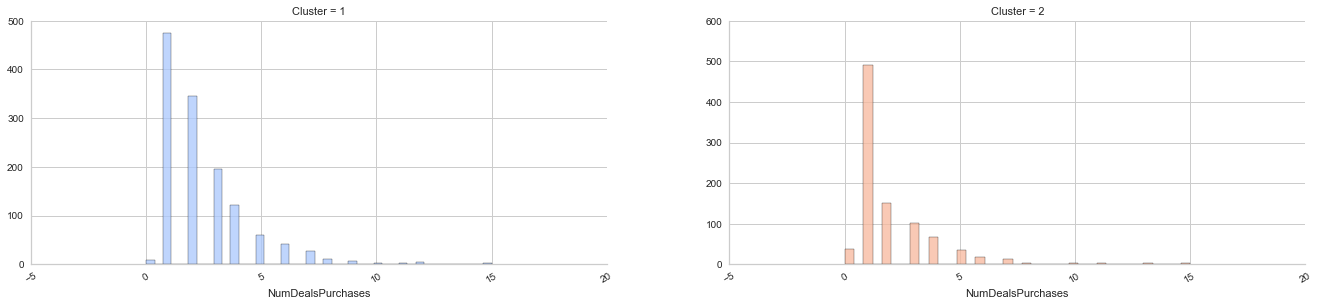

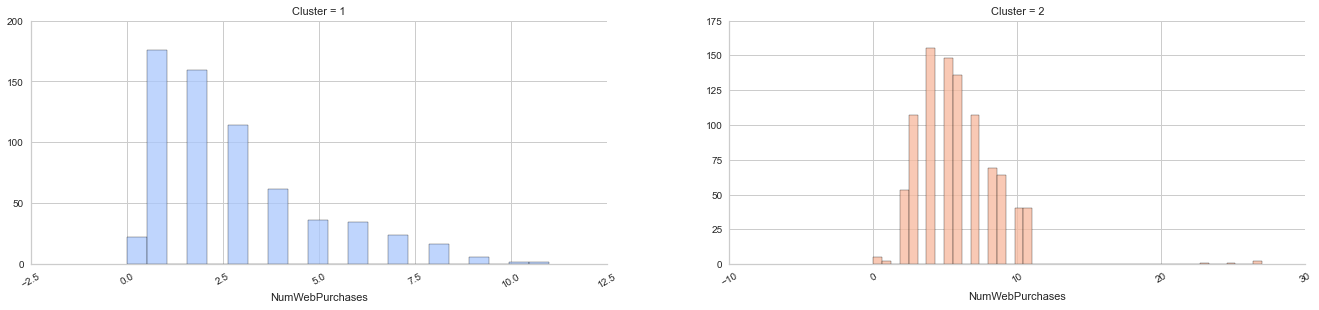

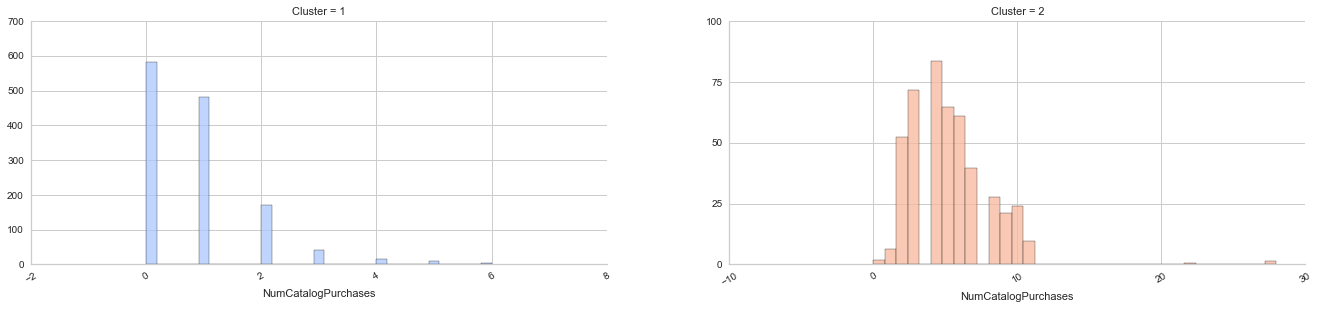

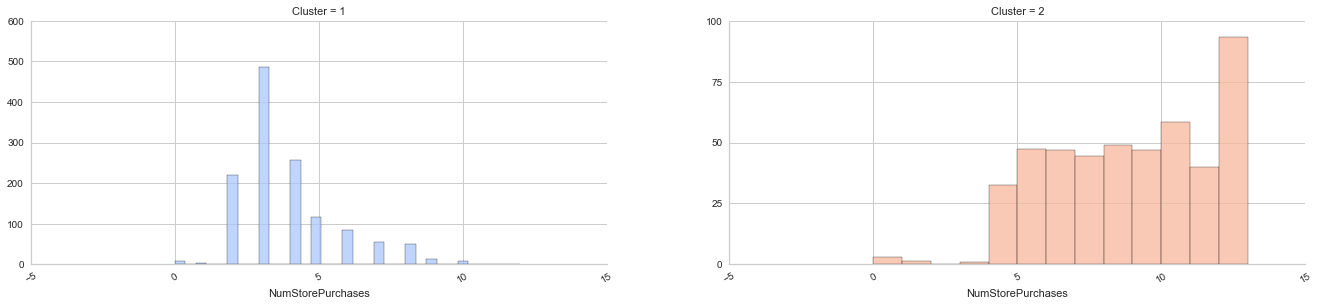

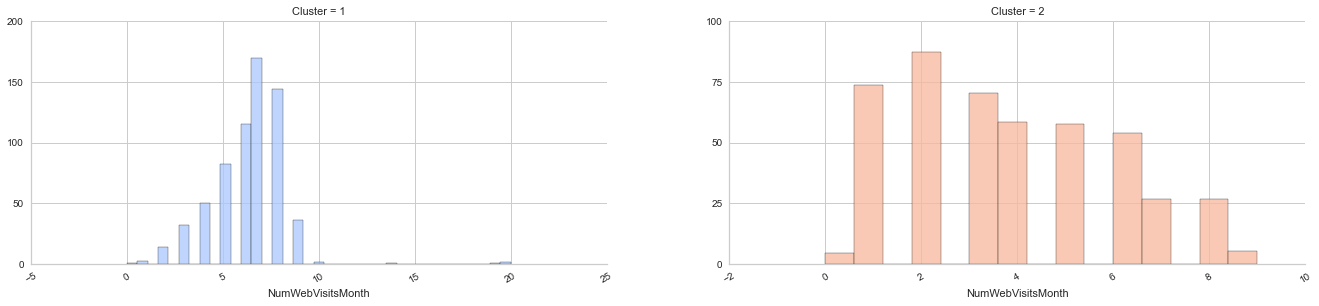

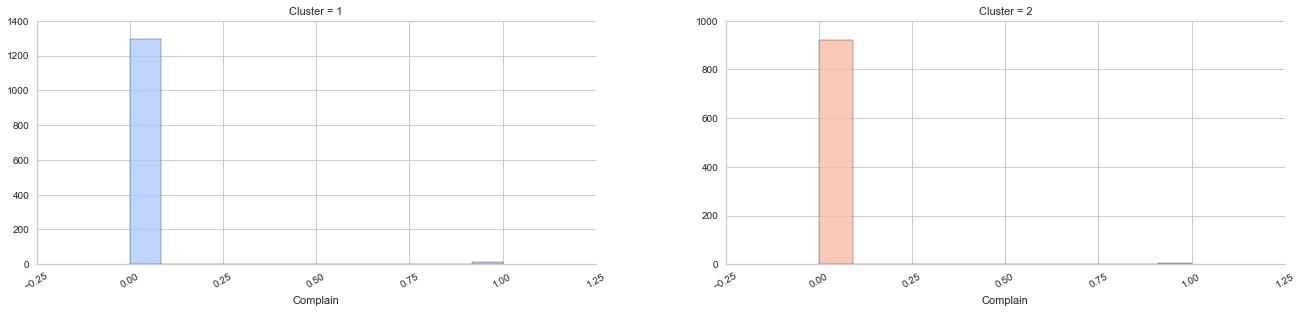

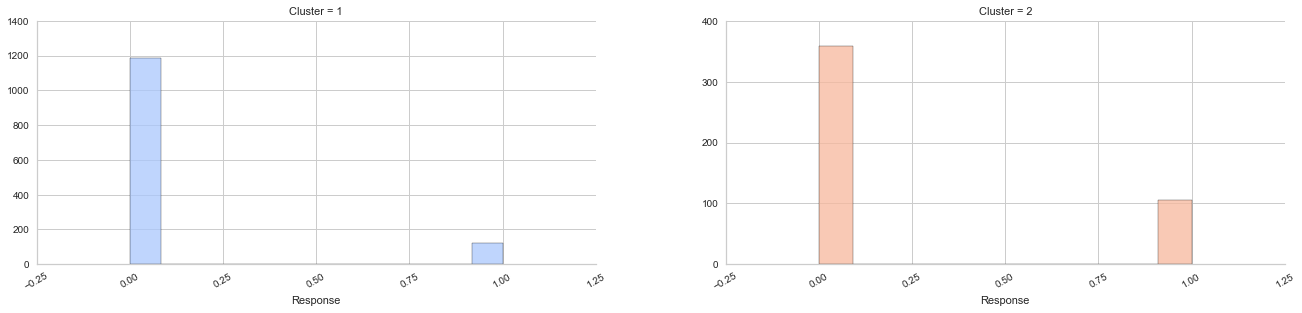

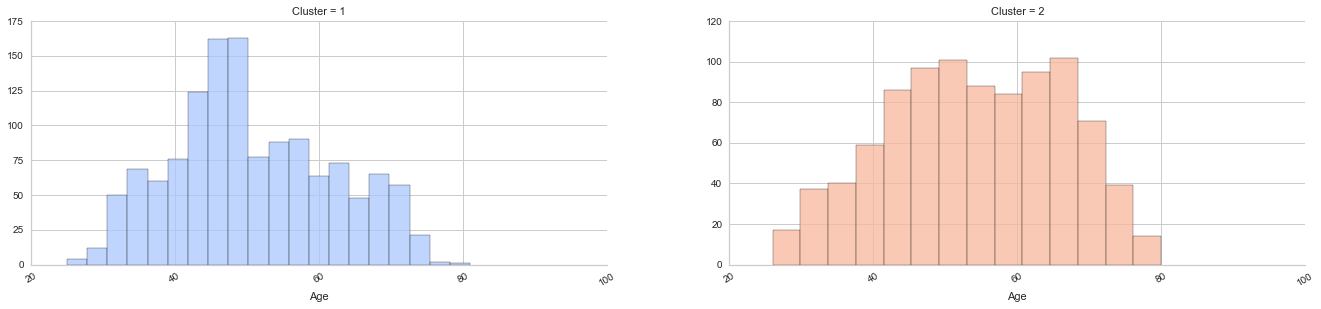

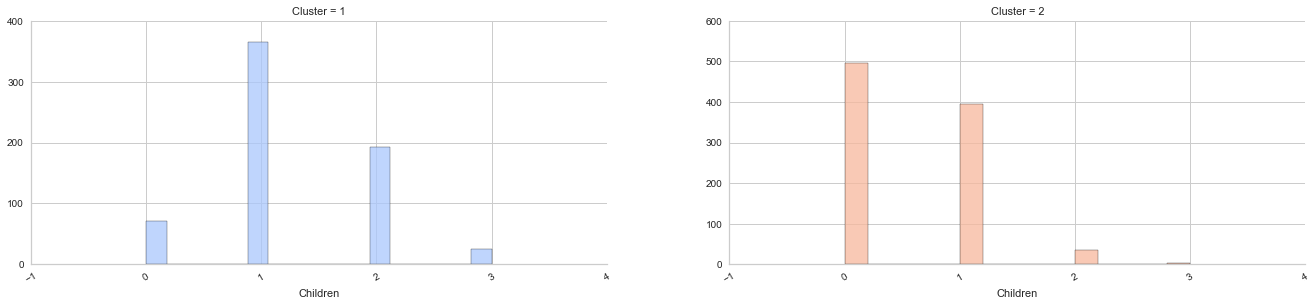

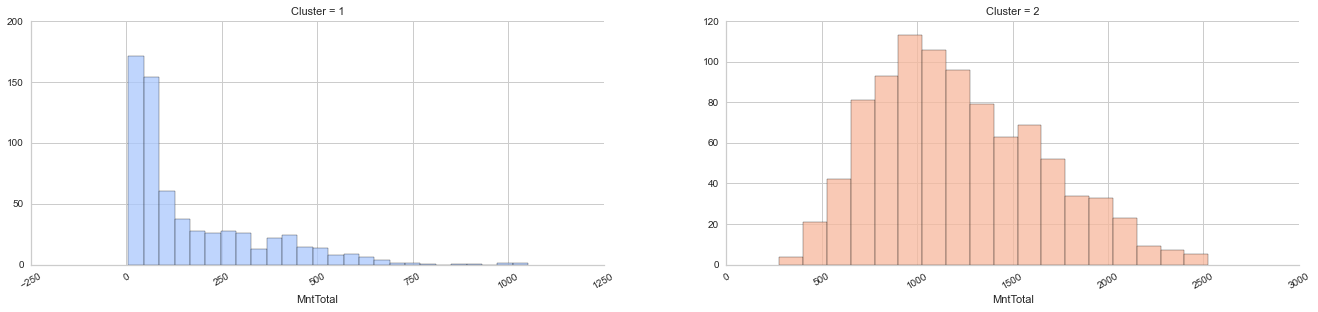

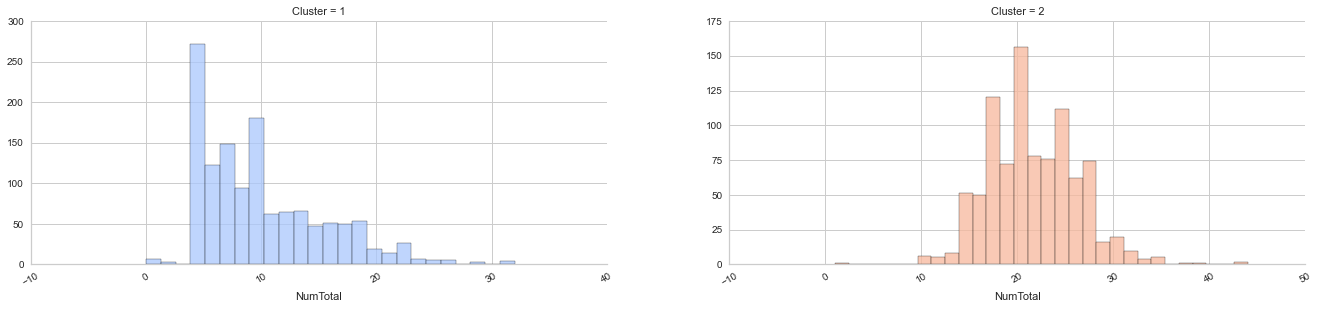

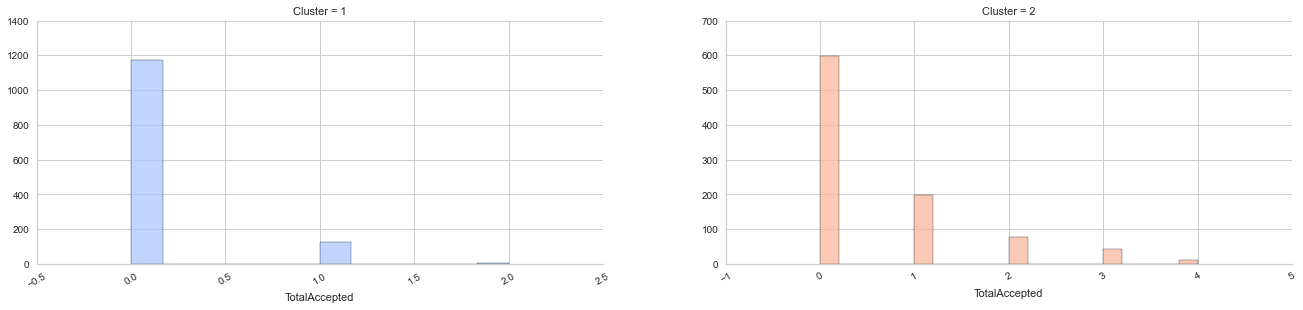

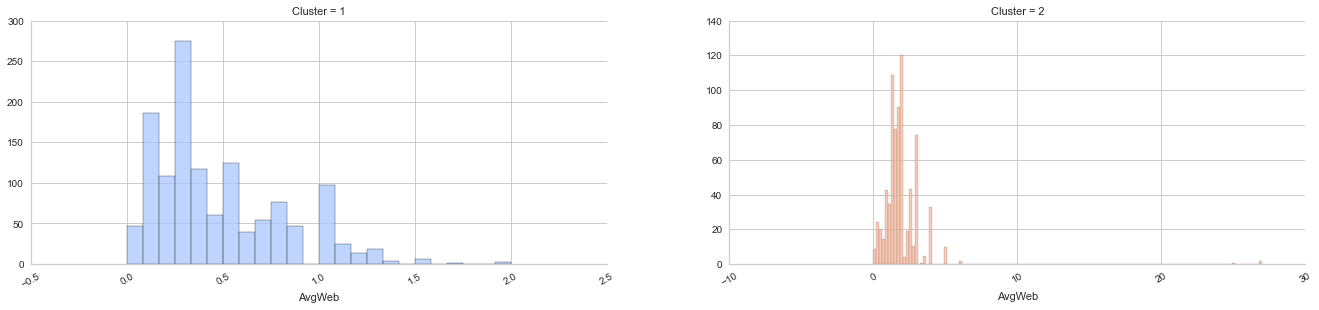

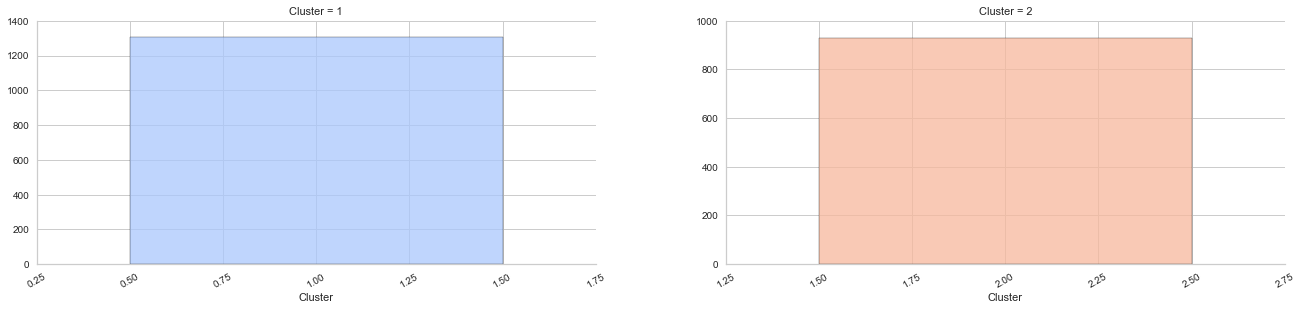

In [60]:
# For every columns in dataset
for i in df_cluster:
    g = sns.FacetGrid(df_cluster, col = "Cluster", hue = "Cluster", palette = "coolwarm", sharey=False, sharex=False)
    g.map(sns.histplot,i) 
    
    g.set_xticklabels(rotation=30)
    g.set_yticklabels()
    g.fig.set_figheight(5)
    g.fig.set_figwidth(20)

**COMMENT:**
- The income level of this 2 groups shows clear difference. Cluster 1 have obvious higher income than Cluster 2.
Cluster 1 have less kids(as well as less children) at home. Most of them have no kids and only a few(about 5%) have 1 kids; While most customers in cluster 2 have 1 kid, and some have 2 kids.

- Cluster 1 customers buy much more amount products than cluster 2 customers. Almost every products shows the same trend. This result indicates that people in cluster 1 have more consumption power, and they are more likely to purchase goods from the company. The total number of accepting offers in compaigns is also consistent with my conclusion. The group with more consumption power(cluster 1) accept more offers than the other.

- Also, people in cluster 1 have much more purchasing numbers in different place. Among all these places, they may prefer to buy products in real store. It is not surprising since most of our customers are in their middle age or old age.

- The last small obervation is that cluster 2 have some extreme situations in product purchasing amount. Some customer in cluster 2 purchasing unusual amount of products. One plausible assumption is that they might buy a lot of goods for special festivals or parties. Checking their purchasing date may verify this assumption.

---

### Gaussian Mixture Model

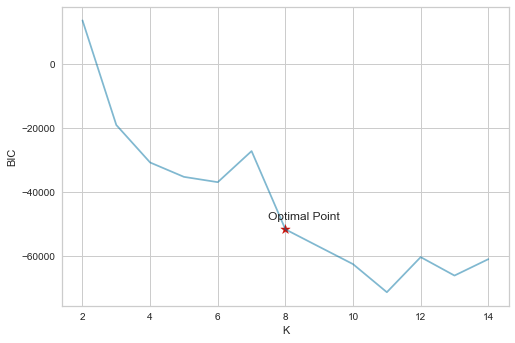

In [61]:
from sklearn.mixture import GaussianMixture

log_like_lst = []
all_cluster = 15

for k in range(2, all_cluster):
    gmm = GaussianMixture(n_components = k, random_state = 100).fit(cluster_data)
    log_like = gmm.bic(cluster_data)
    log_like_lst.append(log_like)

elbow = 8
plt.plot(range(2, all_cluster), log_like_lst, alpha=0.5)
plt.scatter(elbow, log_like_lst[elbow-2], s=100, c='r', marker='*')
plt.ylabel('BIC')
plt.xlabel('K')
plt.annotate('Optimal Point' ,(elbow, log_like_lst[elbow-1]), xytext=(elbow - 0.5,log_like_lst[elbow-2] + 3000))
plt.show()

**COMMENT:** 
- *GMM is a soft version of K-means, calculating the sample probability to different clusters. It is also a good clustering algorithm.*

- *Here, we use BIC to evluate the effectiveness of clustering. When K=8, the BIC score comes to the balanced point (will not show much improvement when increasing K), so we choose 8 as the final clustering result.*

In [62]:
# Building & Fitting GMM Models
gmm = GaussianMixture(n_components = 8, random_state = 100).fit(cluster_data)
labels = gmm.predict(cluster_data)

df_cluster['Cluster_GMM'] = labels + 1

In [63]:
# Inspect the cluter nums
df_cluster["Cluster_GMM"].value_counts()

4    727
3    504
5    327
7    279
6    219
1    117
2     43
8     20
Name: Cluster_GMM, dtype: int64

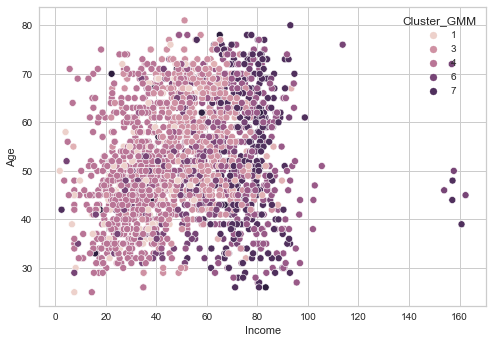

In [64]:
# Inspect the cluster difference (By Income & Age)
sns.scatterplot(x='Income',y='Age',hue='Cluster_GMM',data=df_cluster)
plt.show()

C:\Users\D4Rk_C4K3\anaconda3\lib\site-packages\seaborn\axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


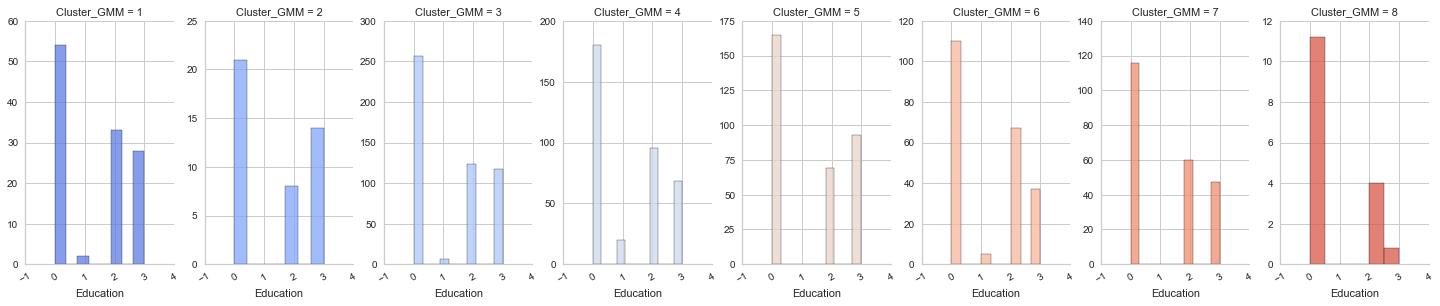

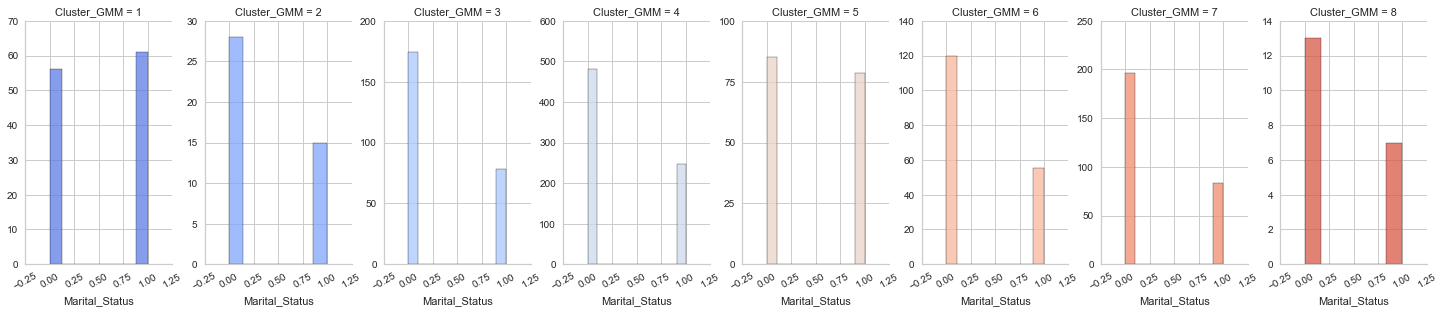

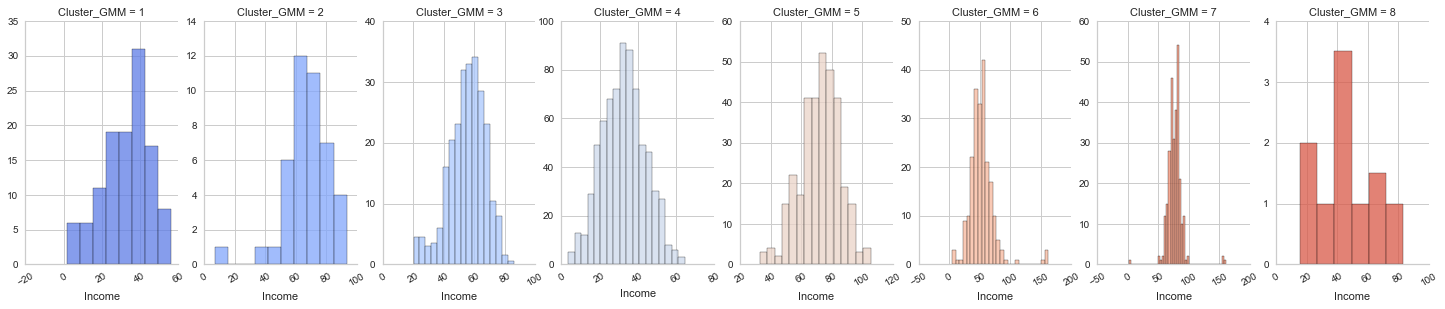

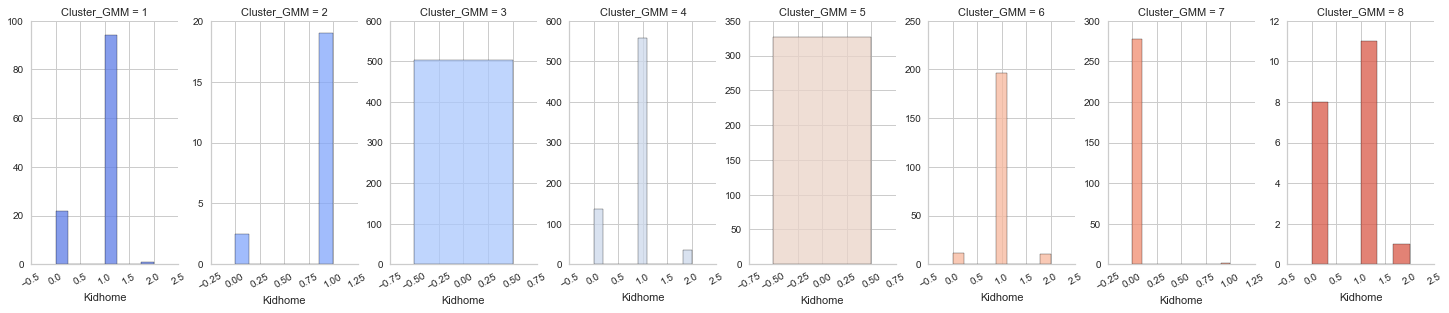

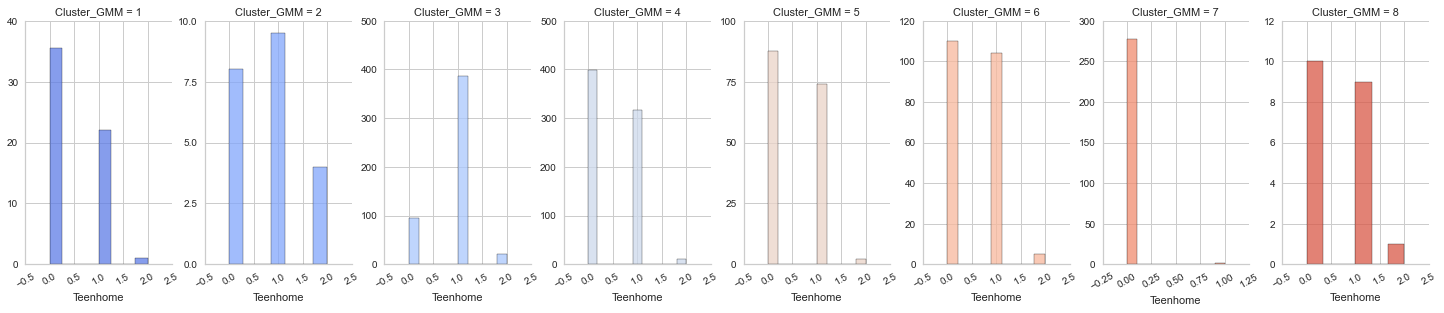

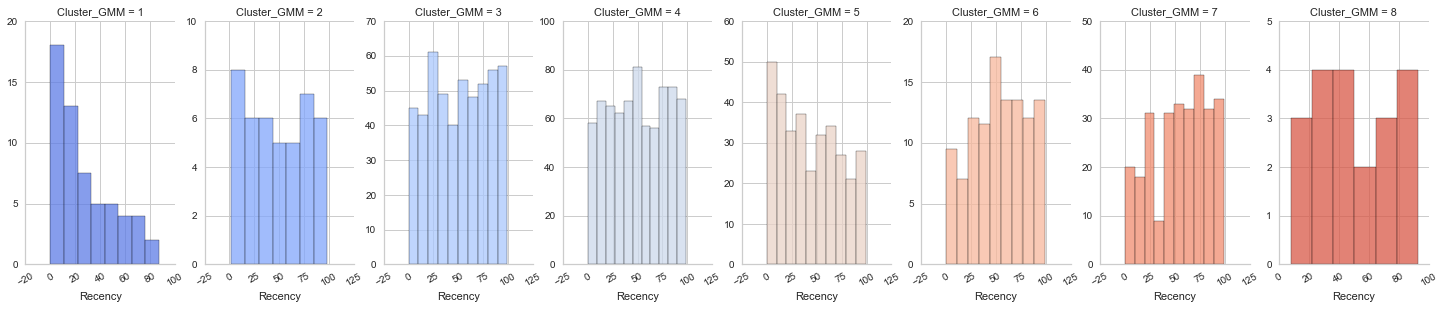

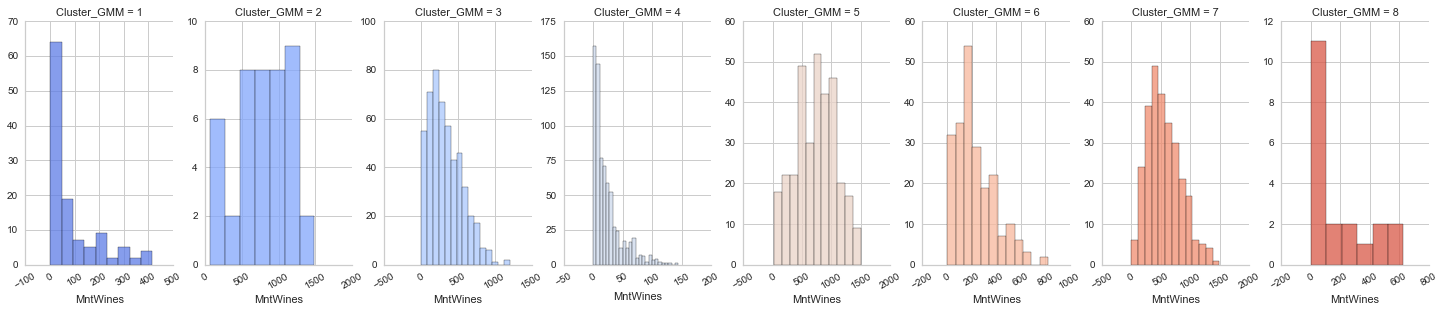

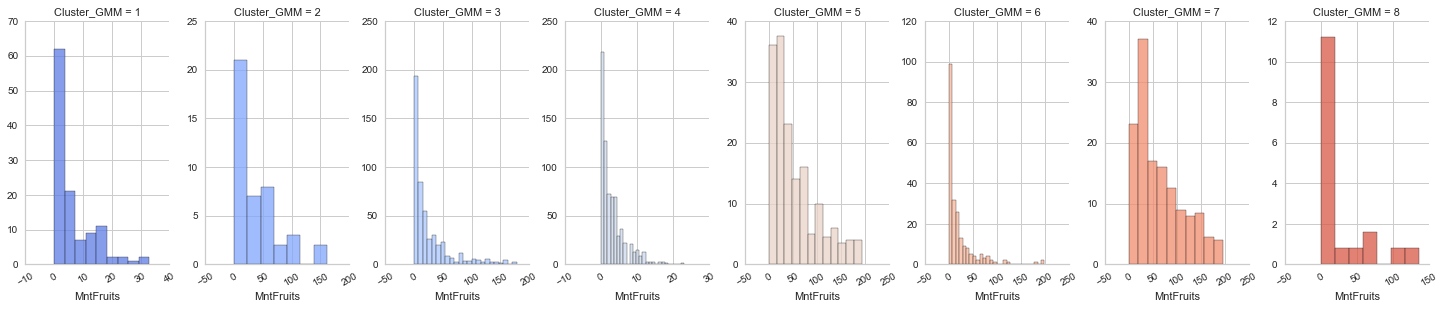

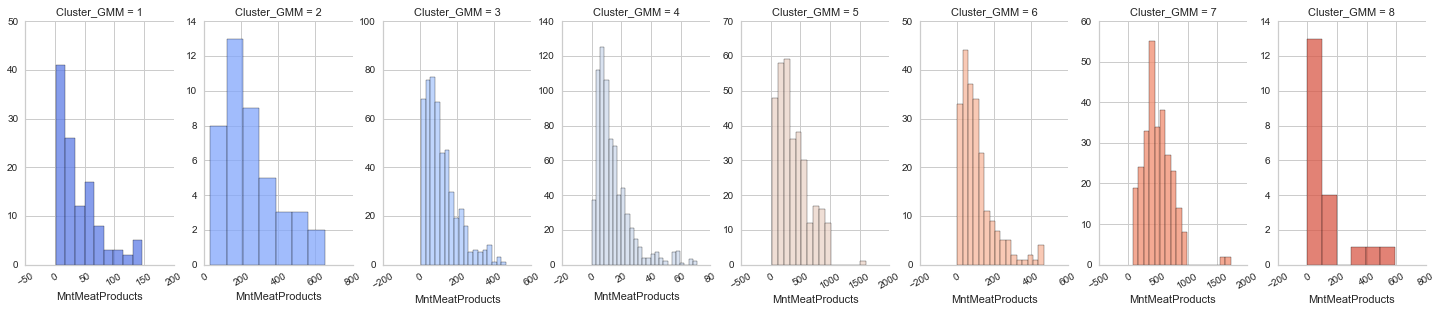

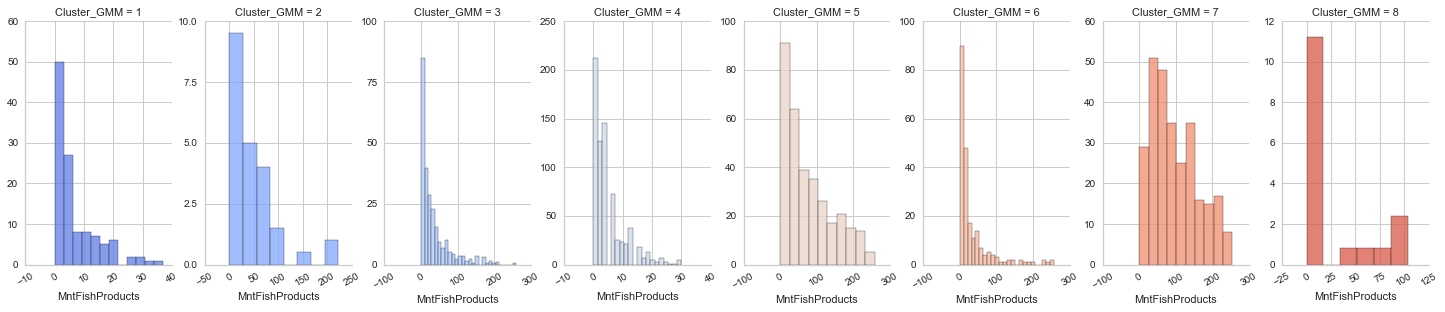

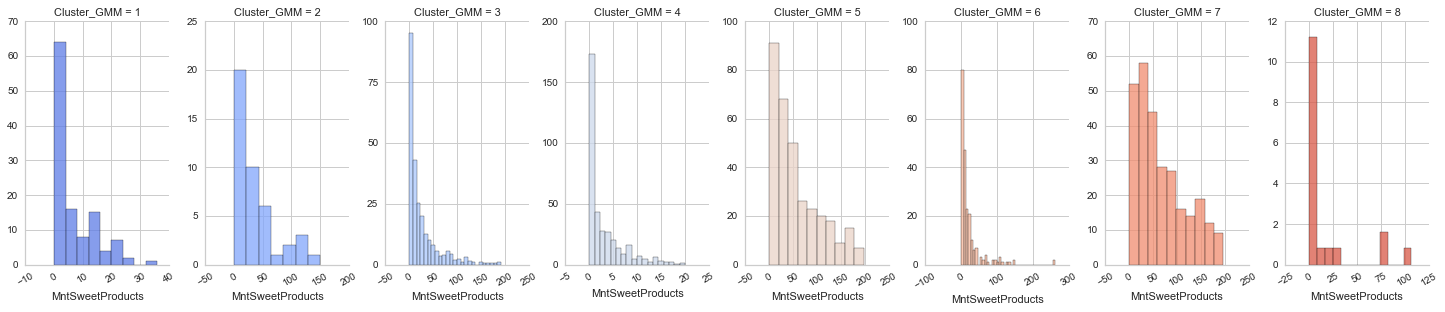

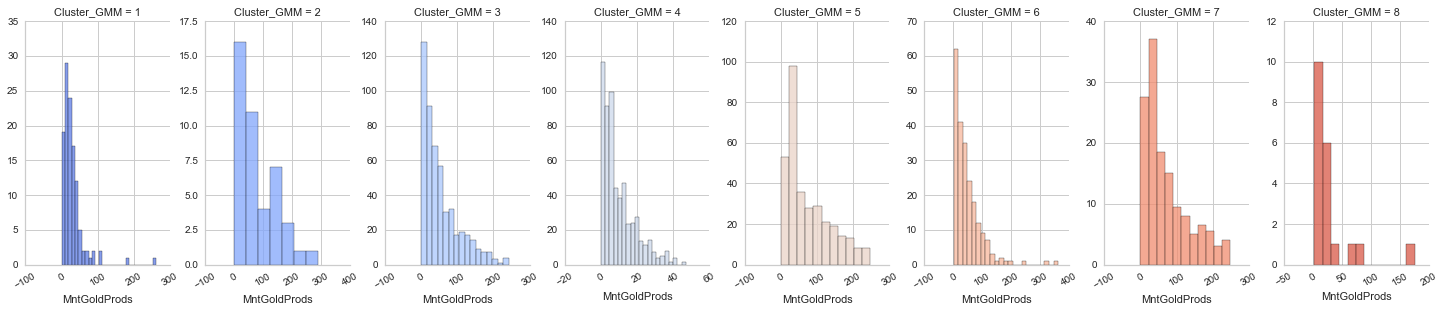

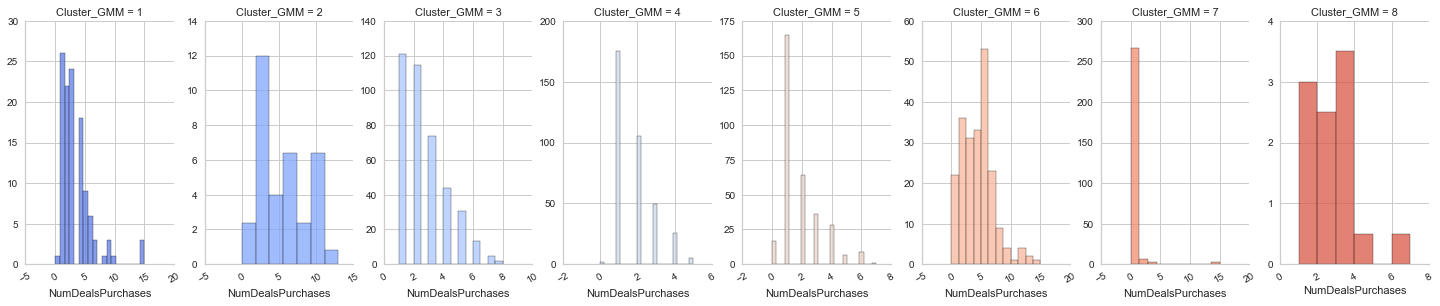

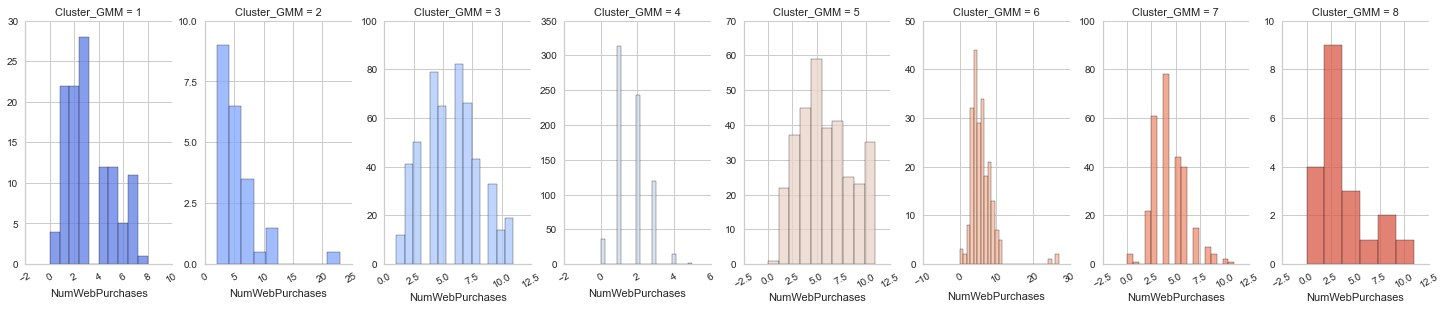

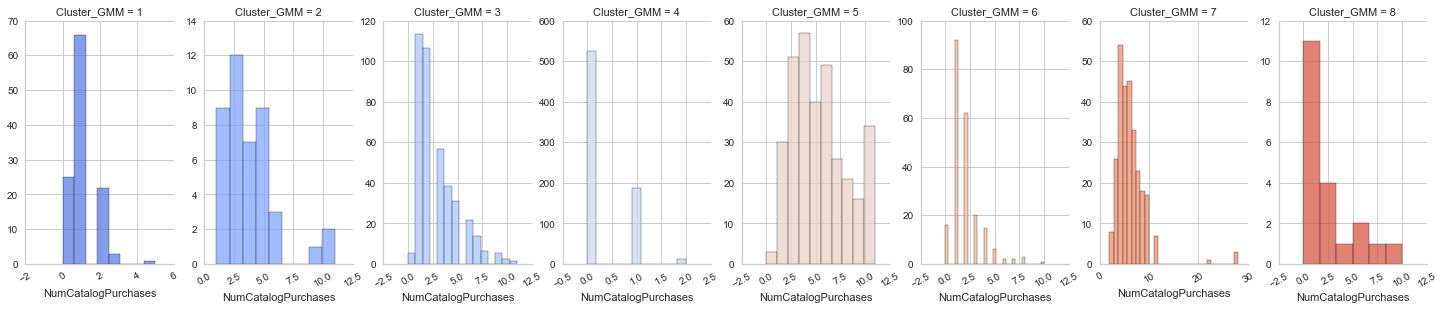

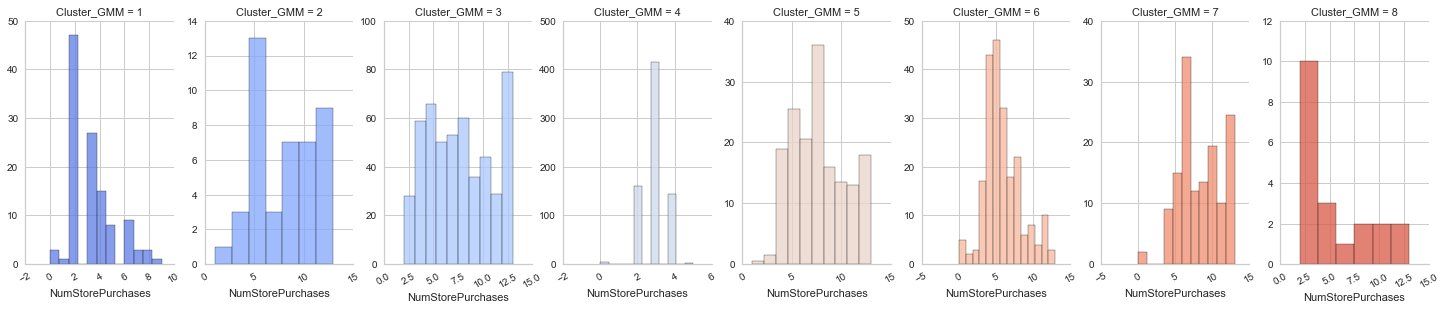

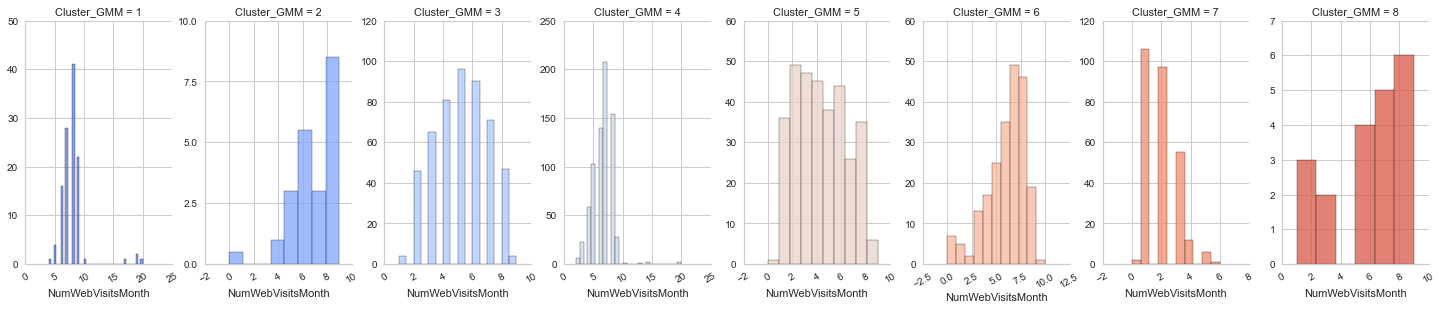

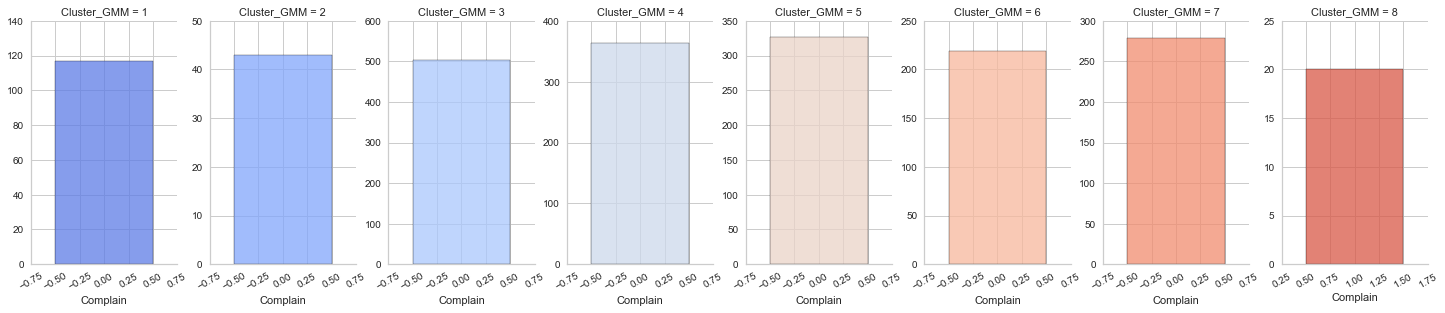

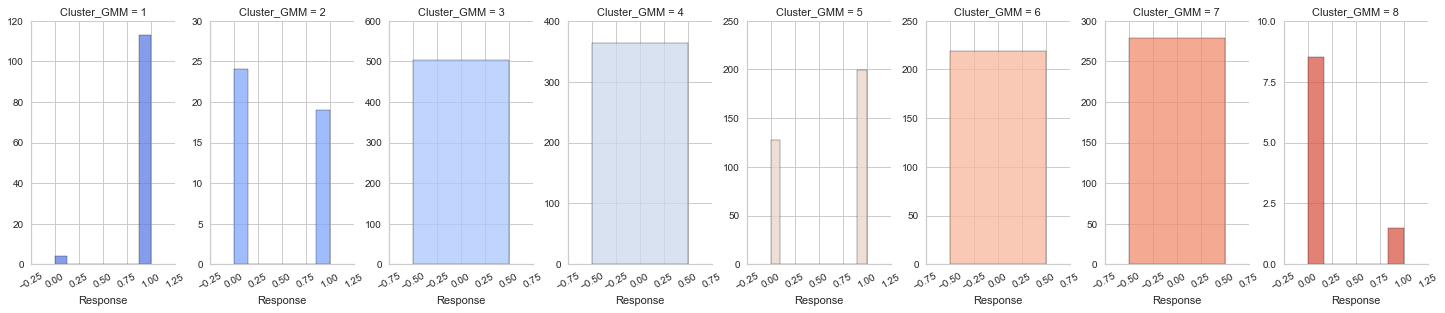

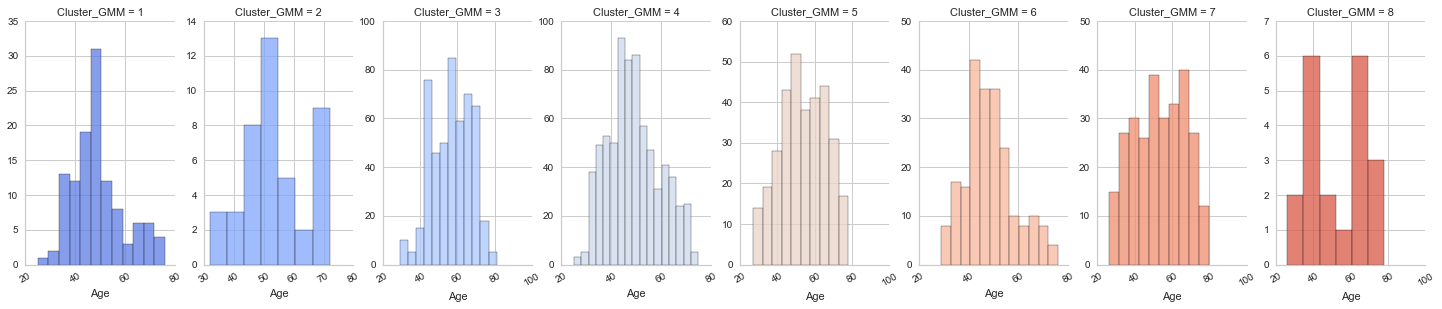

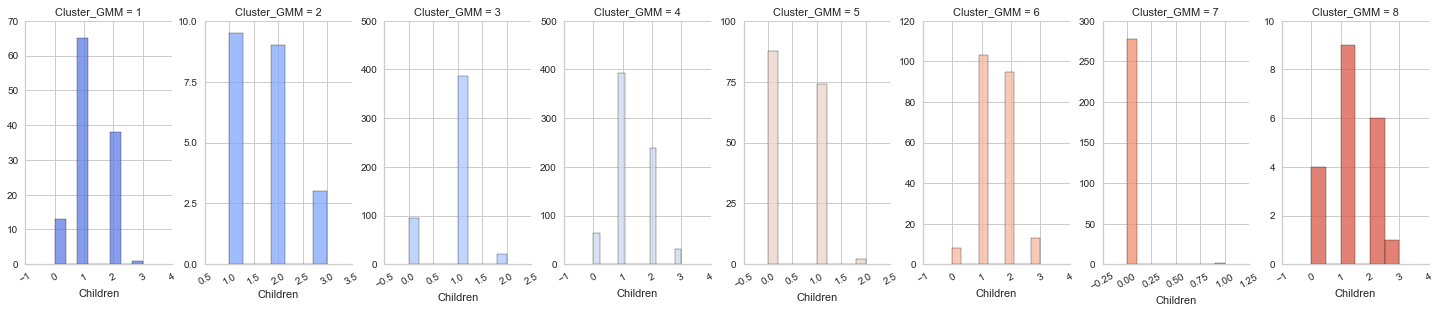

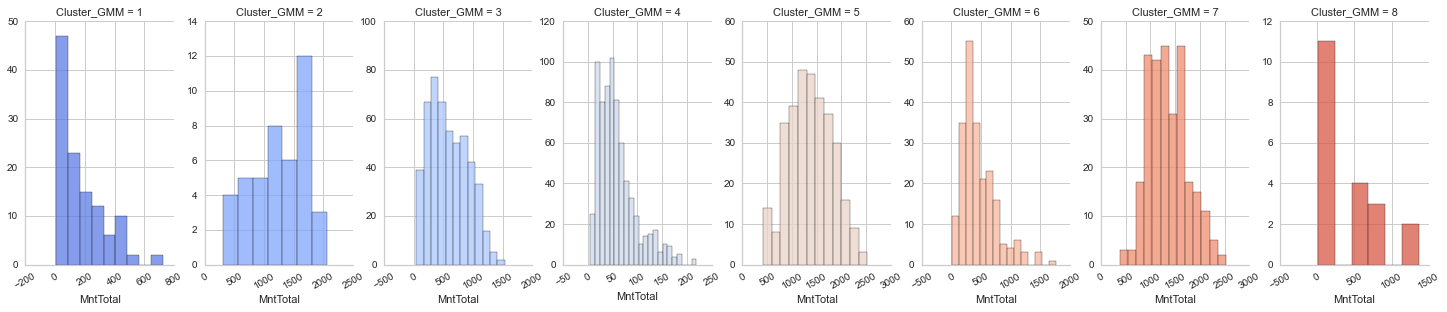

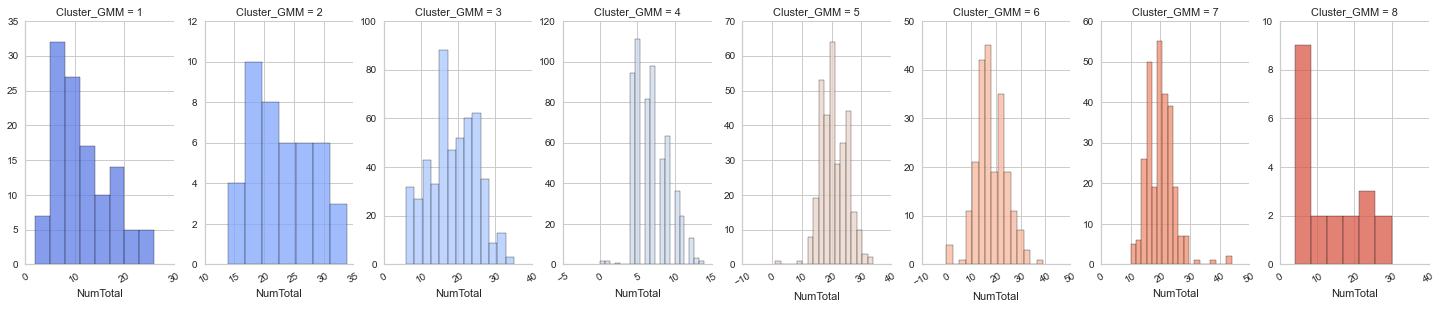

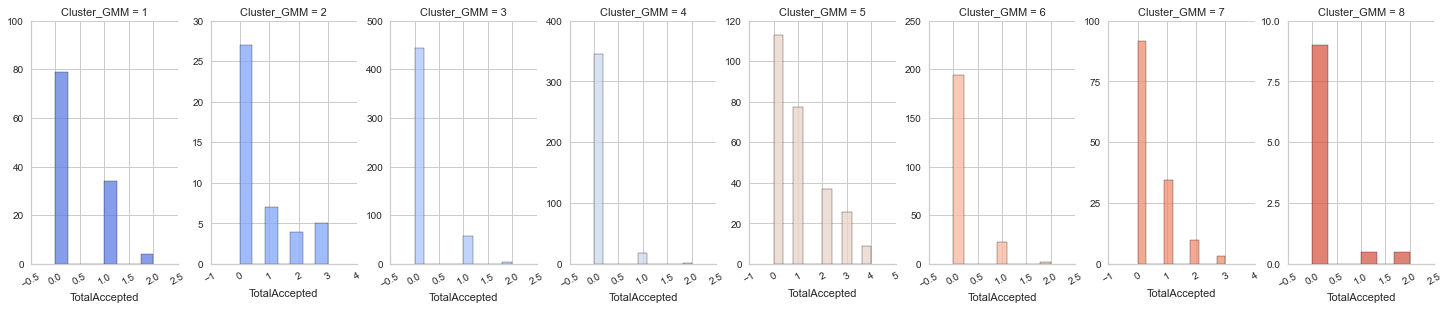

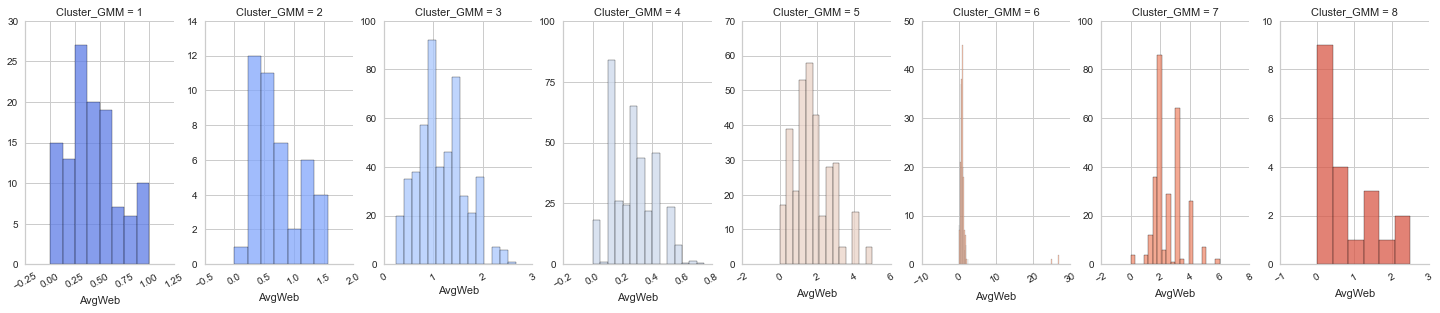

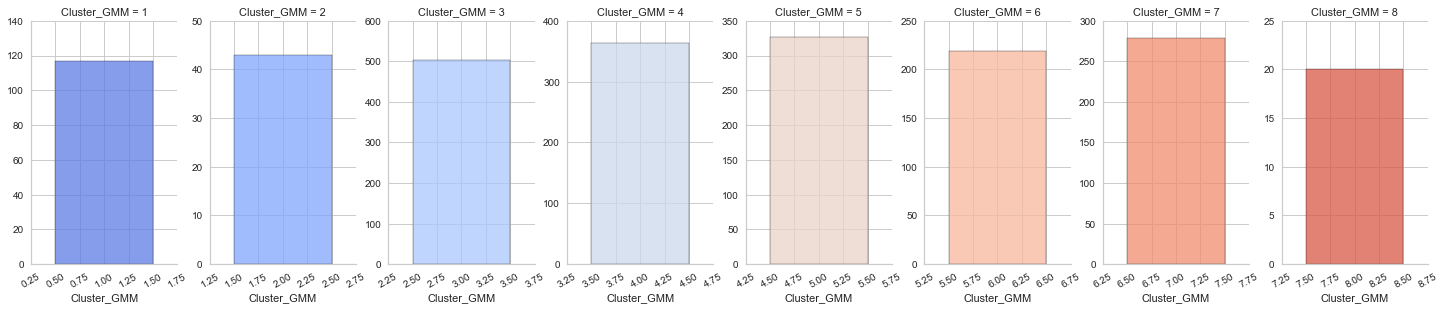

In [65]:
# For every columns in dataset
for i in df_cluster:
    if i == 'Cluster':
        continue
    g = sns.FacetGrid(df_cluster, col = "Cluster_GMM", hue = "Cluster_GMM", palette = "coolwarm", sharey=False, sharex=False)
    g.map(sns.histplot,i) 
    g.set_xticklabels(rotation=30)
    g.set_yticklabels()
    g.fig.set_figheight(5)
    g.fig.set_figwidth(20)
    

**COMMENTS:** *There are 8 different clusters, which is difficult to describe, but we could see clear difference in their basic information, family condition and consumption power*

---
---

## Summary

### 1_ Customer-Related Summary
- Most of our Customer base belongs to those who are commited in a relationship(Married Couples or Together) or people who hold a Bachelors Degree. We are not popular among people with Basic education and among those who used to be in a relationship and now they are not.
- Most of our Customers are around 45-50 years old.
- Most of them have either one or no kids/teens at home. Those with more than 1 kid/Teen are either not familiar with our business or are not interested.
- Our Marketing Campaign yeilded exponentially more Negative responses than Positive ones.
- Those whom we approached with our Campaign earned 10,000 to 100,000 units of currency.
- Those with higher income were more interested, while those with income lower than 14-15,000 were either not interested or they rejected our offers.
- PhD or Masters Degree holders were more likely to accept our offers. Those with lower levels of education were hardly interested.
- Those who have lower level of education have less income, while those with Bachelors, Masters or PhD degree do not have clear distinction between their income.
- Those with no kids at home had higher income.
- Single people seemed more likely to accept our offers as compared to those commited in a relationship. But as shown by KDE plot, different Marital Status does not seem to be the cause of positive or negative response to our marketing campaign.
- No Linear Relationships are exhibited by the Customer data

### 2_ Supervised Prediction Summary

<table>
    <thead>
    <tr>
        <td style="align:center;font-weight:bold;">Algorithms</td>
        <td style="align:center;font-weight:bold;">Mathews Correlation Coefficient</td>
        <td style="align:center;font-weight:bold;">Anomaly Correlation Coefficient</td>
    </tr>
    </thead>
    <tr>
        <td style="align:left;font-weight:bold;">Logistic Regression</td>
        <td><span style="color:red;">0.499386 mean (0.030593 std)</td>
        <td><span style="color:red;">0.749420 mean (0.015291 std)</td>
    </tr>
    <tr>
        <td style="align:left;font-weight:bold;">Boosting Tree</td>
        <td><span style="color:green;">0.821840 mean (0.169042 std)</span></td>
        <td><span style="color:green;">0.904652 mean (0.096071 std)</span></td>
    </tr>
    <tr>
        <td style="align:left;font-weight:bold;">SVM</td>
        <td><span style="color:red;">0.644576 mean (0.039894 std)</td>
        <td><span style="color:red;">0.802105 mean (0.023620 std)</td>
    </tr>
    <tr>
        <td style="align:left;font-weight:bold;">Neural Network</td>
        <td><span style="color:red;">0.631383 mean (0.086735 std)</td>
        <td><span style="color:red;">0.805347 mean (0.050553 std)</td>
    </tr>
</table>

- Boosting Tree works really well among all the tested models.
- Feature-Selected Dataset shows usability in the models
- Therefore, we are using **Boosting Tree dataset + Feature-Selected dataset** to achieve the best MCC score.

#### Overall Model Performance
<table>
    <thead>
        <tr>
            <td></td>
            <td style="align:center;font-weight:bold;">Precision</td>
            <td style="align:center;font-weight:bold;">Recall</td>
            <td style="align:center;font-weight:bold;">F1 score</td>
            <td style="align:center;font-weight:bold;">Support</td>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td style="align:right;font-weight:bold;">0</td>
            <td>0.93</td>
            <td>0.93</td>
            <td>0.93</td>
            <td>204</td>
        </tr>
        <tr>
            <td style="align:right;font-weight:bold;">1</td>
            <td>0.55</td>
            <td>0.53</td>
            <td>0.54</td>
            <td>32</td>
        </tr>
        <tr>
            <td style="align:right;font-weight:bold;">Accuracy</td>
            <td></td>
            <td></td>
            <td>88</td>
            <td>236</td>
        </tr>
        <tr>
            <td style="align:right;font-weight:bold;">Macro Avg</td>
            <td>0.74</td>
            <td>0.73</td>
            <td>0.73</td>
            <td>236</td>
        </tr>
        <tr>
            <td style="align:right;font-weight:bold;">Weigted Avg</td>
            <td>0.88</td>
            <td>0.88</td>
            <td>0.88</td>
            <td>236</td>
        </tr>
    </tbody>
</table>

- The overall test accuracy of the model is 0.88. But dive deep into the score report, the model performs quite good in recognizing negative samples(0), but not good in positive samples (precision: 0.55, recall: 0.55).
- The test MCC is 0.469, which indicates that the model may not good at finding positive samples in test set. While we find the Train MCC is 0.98, this result shows there might exist overfitting problem in the model. (tried and couldn't solve it)

### 3_ Unsupervised Prediction Summary

#####    K Means
- Cluster 1 have obvious higher income than Cluster 2. Cluster 1 have less kids(as well as less children) at home. Most of them have no kids and only a few(about 5%) have 1 kids; While most customers in cluster 2 have 1 kid, and some have 2 kids.

- Cluster 1 customers buy much more amount products than cluster 2 customers. Almost every products shows the same trend. This result indicates that people in cluster 1 have more consumption power, and they are more likely to purchase goods from the company. The total number of accepting offers in compaigns is also consistent. The group with more consumption power(cluster 1) accept more offers than the other.

- Also, people in cluster 1 have much more purchasing numbers in different place. Among all these places, they may prefer to buy products in real store. It is not surprising since most of our customers are in their middle age or old age.

- cluster 2 have some extreme situations in product purchasing amount. Some customer in cluster 2 purchasing unusual amount of products. One plausible assumption is that they might buy a lot of goods for special festivals or parties. Checking their purchasing date may verify this assumption.

##### Gaussian Mixture Model
- Working with GMM, we found that it created 8 different clusters.

- Apparently the 8 clusters have a range of lowest to highest in each field (such as education, no. of kids at home etc)


# END OF DOCUMENT